# TEAM ID : PTID-CDS-FEB-24-1837

# BATCH ID :
   # 11-SEP-23-BUN-021-WDM09-BAN
   # 28-SEP-23-BUN-021-WDM09-BAN

# PRCP-1018-BikeRental

### AIM
 * The primary goal is to develop a machine learning model for predicting the bike rental count. 
 
 * Additionally, the aim is to provide valuable suggestions to Rental Agency for identifying ,how much bike can be rented from their agency based on the environmental and seasonal changes.

* Task 1: Generate a comprehensive data analysis report for the provided dataset.


* Task 2: Develop a predictive model using machine learning techniques to predict how much the bike can be rented daily.


* Task 3: Provide recommendations to Rental Agency to predict daily bike rental count based on environmental and seasonal settings.

### Domain Analysis

#### Domain :Bike Rental

Bike sharing systems are a new version of traditional bike rentals where the whole process from membership, rental and return back has been automated. Through these systems, users are easily able to rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.

### Attribute Information:

**01) instant** -
* 'instant' indicates the number in which an entry has been made in the dataset.

**02) dteday** -
* 'dteday' indicates the date in which an entry has been made.

**03) season** -
* It indicates the four seasons in numeric.
 * '1' represents winter
 * '2' represents spring
 * '3' represents summer
 * '4' represents fall

**04) yr** -
* 'yr' indicates the year in which the entries have been made.
 * '0' represents the year 2011
 * '1' represents the year 2012

**05) mnth** -
* 'mnth' indicates the month in which the entries have been made.
* It is in numeric format ranging form 1 to 12 in order of the months, *January* as '1' to *December* as '12'.

**06) holiday** -
* 'holiday' indicates whether the day in which the entry has been made is a holiday or not.
* It is in numeric format-
 * '0' for the days which are not holidays
 * '1' for the day which are holidays

**07) weekday** -
* 'weekday' indicates the 7 days of a week in a numeric format.
 * it ranges from '0' to '6' in order of the weekdays, '0' as *monday* to '6' as *sunday*.

**08) workingday** -
* it generally represents the days in which people go to work.
 * if it is neither weekend nor holiday it is represented as '1'
 * otherwise it is '0'

**09) weathersit** -
* It represents the situation of weather at the time when an entry has been made.
* It is in numeric format-
 * **'1'** for Clear, Few clouds, Partly cloudy, Partly cloudy
 * **'2'** for Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 * **'3'** for Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 * **'4'** for Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

**10) temp** -
* It indicates the temperature in degree celsius at the time when an entry has been made.
 * the values in the dataset are derived via  (t-t_min)/(t_max-t_min)
 * where, t_min=-8, t_max=+39

**11) atemp** -
* It indicates the normalized feeling temperature in degree celsius at the time when an entry has been made.
 * the values in the dataset are deerived via (t-t_min)/(t_max-t_min)
 * t_min=-16, t_max=+50

**12) hum** -
* It  represents the humidity in the surroundings at the time when an entry has been made.

**13) windspeed** -
* It represents the normalized windspeed in the surroundings at the time when an entry has been made.

**14) casual** -
* It represents the count of casual bike rental users.

**15) registered** -
* It represents the count of registered users.

**16) cnt** -
* It represents the total bike rentals including both the registered and casual users.

# Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data

In [2]:
data = pd.read_csv('day.csv') # load the file(dataset)
pd.set_option('display.max_columns',None)

In [3]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Basic Checks

In [4]:
data.info() # to check whether there is any object type is there or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
data.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windsp

In [6]:
data.shape

(731, 16)

In [7]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Exploratory Data Analysis

In these project,we will focus on total renter.

#### Here we have used new library called dtale

In the dtale,we can find that,it provides an interactive tool for data exploration and analysis. It allows you to visualize your dataset, perform basic data cleaning and manipulation tasks, and gain insights into your data through interactive visualizations.

In [8]:
import dtale as dt
dtale_app = dt.show(data)

In [9]:
dtale_app

In [10]:
data.describe()# it gives the summary of the numerical columns in your DataFrame, including count, mean, standard deviation, minimum, maximum, and quartile values

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Here,we are trying to analyze how the data is distibuted in the seasonal,yearly and weather basis. 

In [13]:
data.season=data.season.map({1:'winter', 2:'spring', 3:'summer', 4:'fall'})
data.yr=data.yr.map({0:'2011', 1:'2012'})
data.weathersit=data.weathersit.map({1:'Clear', 2:'Mist', 3:'Light Precipitation', 4:'Heavy Precipitation'})

#### Yearly Variation

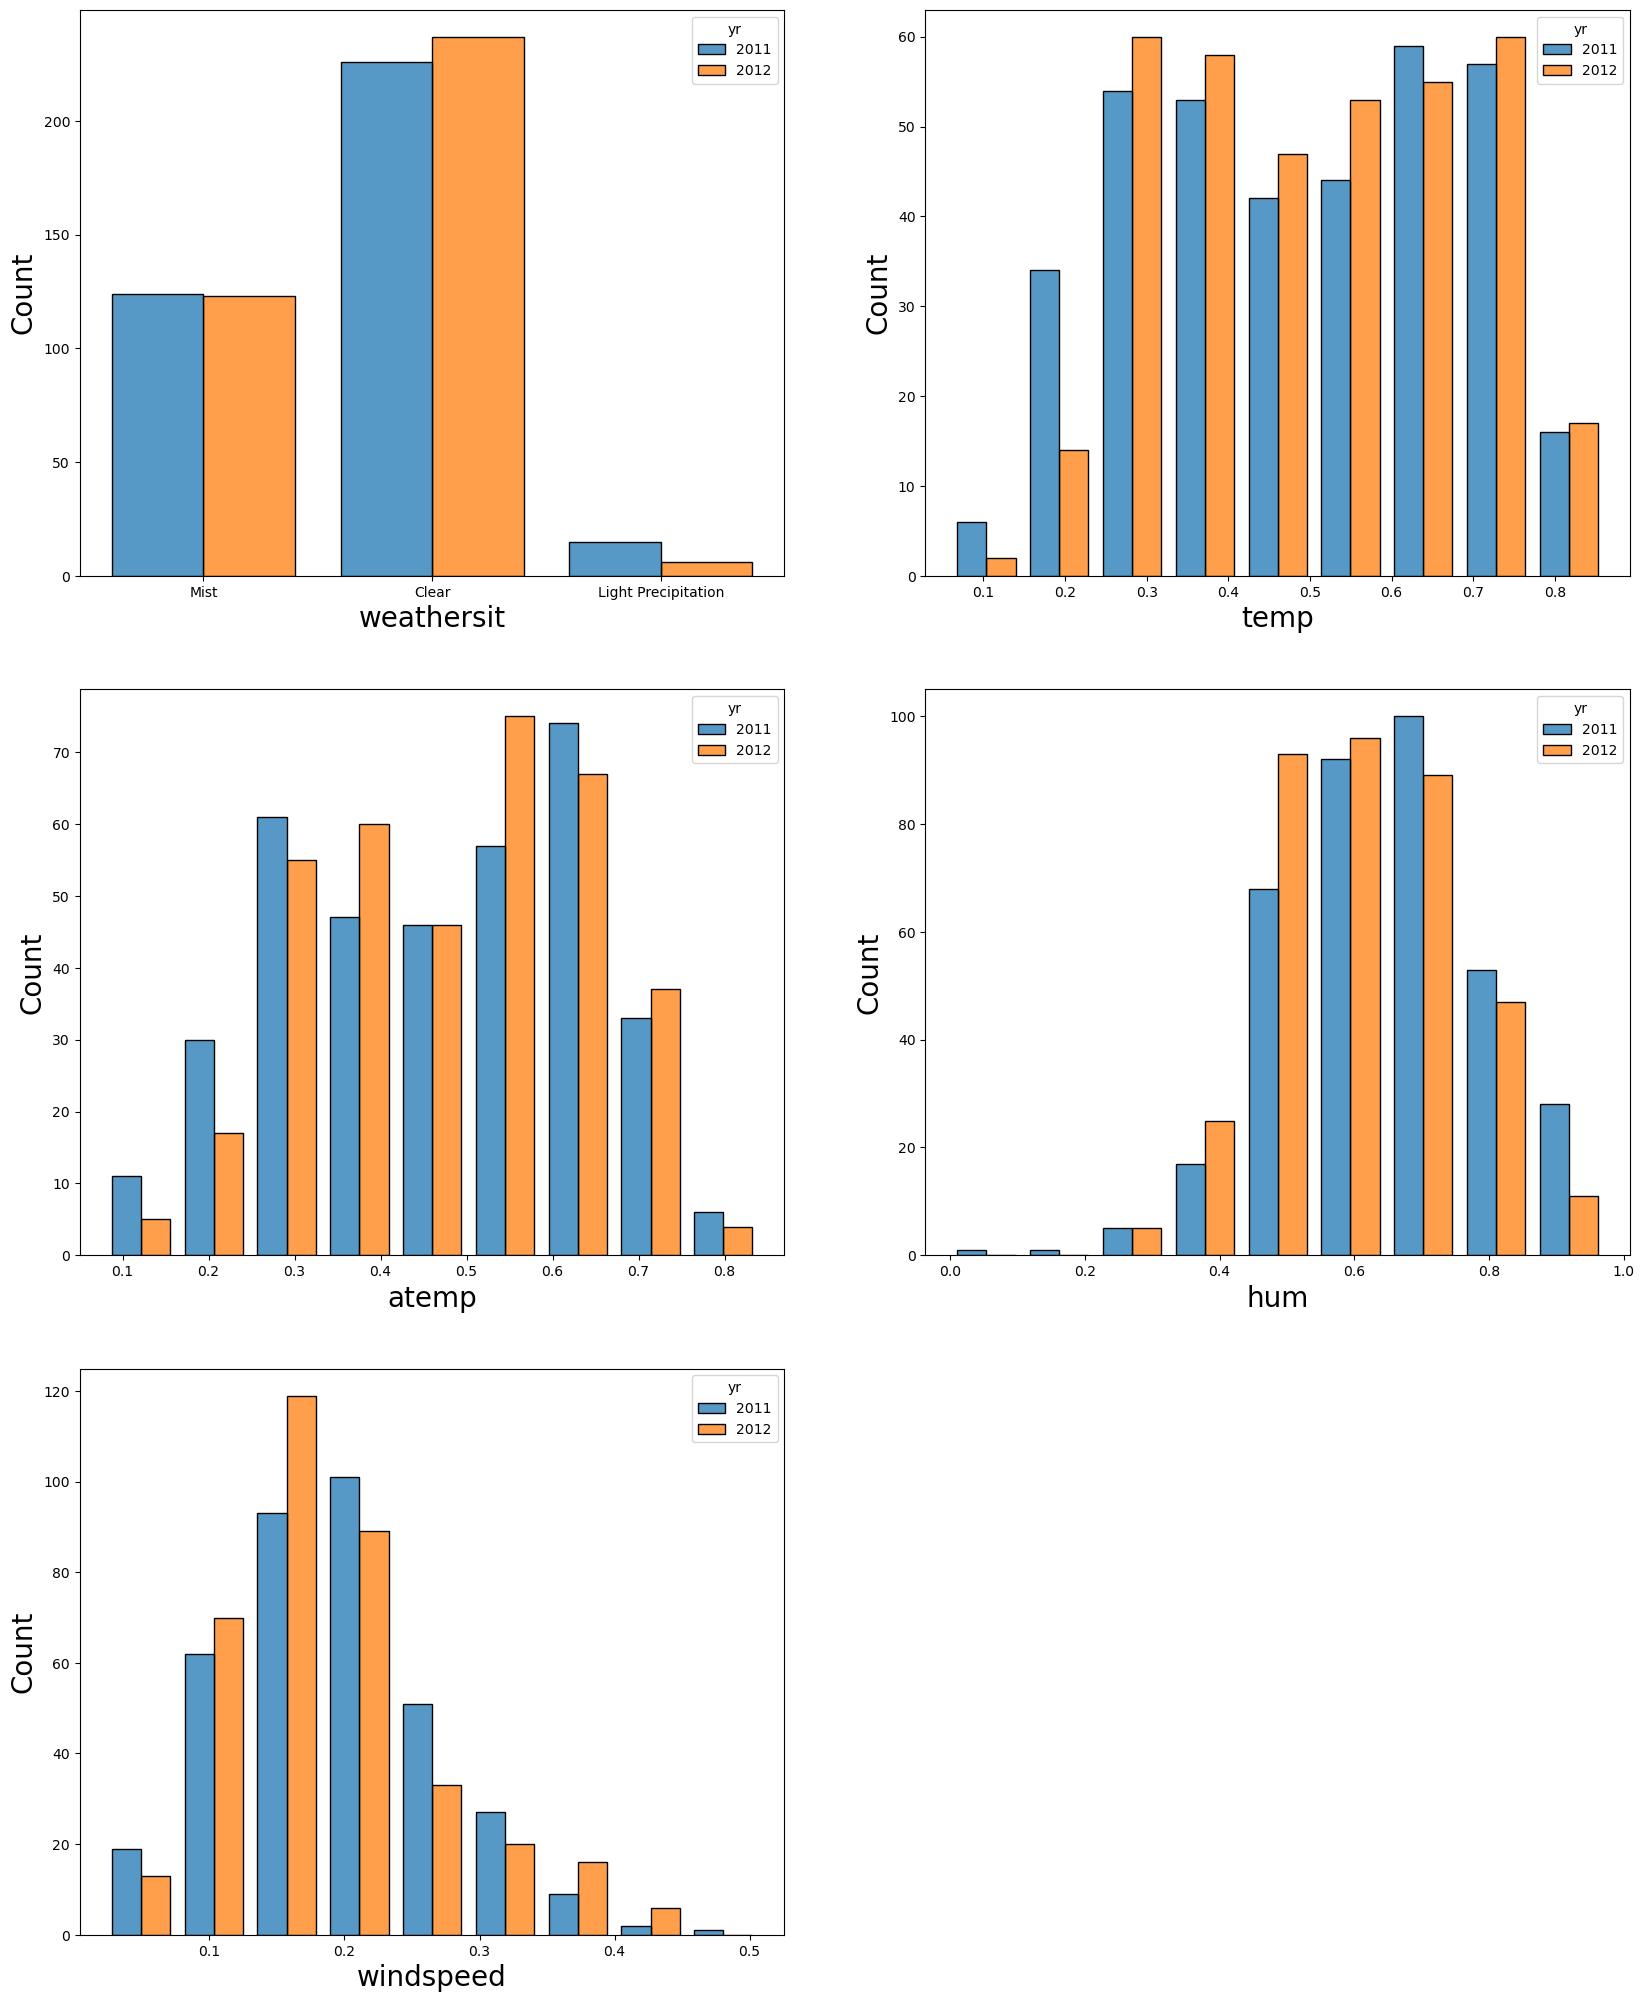

In [14]:
plt.figure(figsize=(20,25))
for num,col in enumerate(['weathersit', 'temp', 'atemp', 'hum', 'windspeed']):
    ax=plt.subplot(3,2,num+1)
    sns.histplot(x=data[col],hue=data.yr,bins=9,multiple="dodge", shrink=.8)
    plt.xlabel(col,fontsize=20)
    plt.ylabel('Count',fontsize=20)
plt.tight_layout;

As per the above histplot observation

--> In the clear stage of weather,the count of bike renting is high.

--> While regarding temp, rental is high in 2012.

--> overall in the second year(2012) the count of rental is high.

#### Seasonal Variation

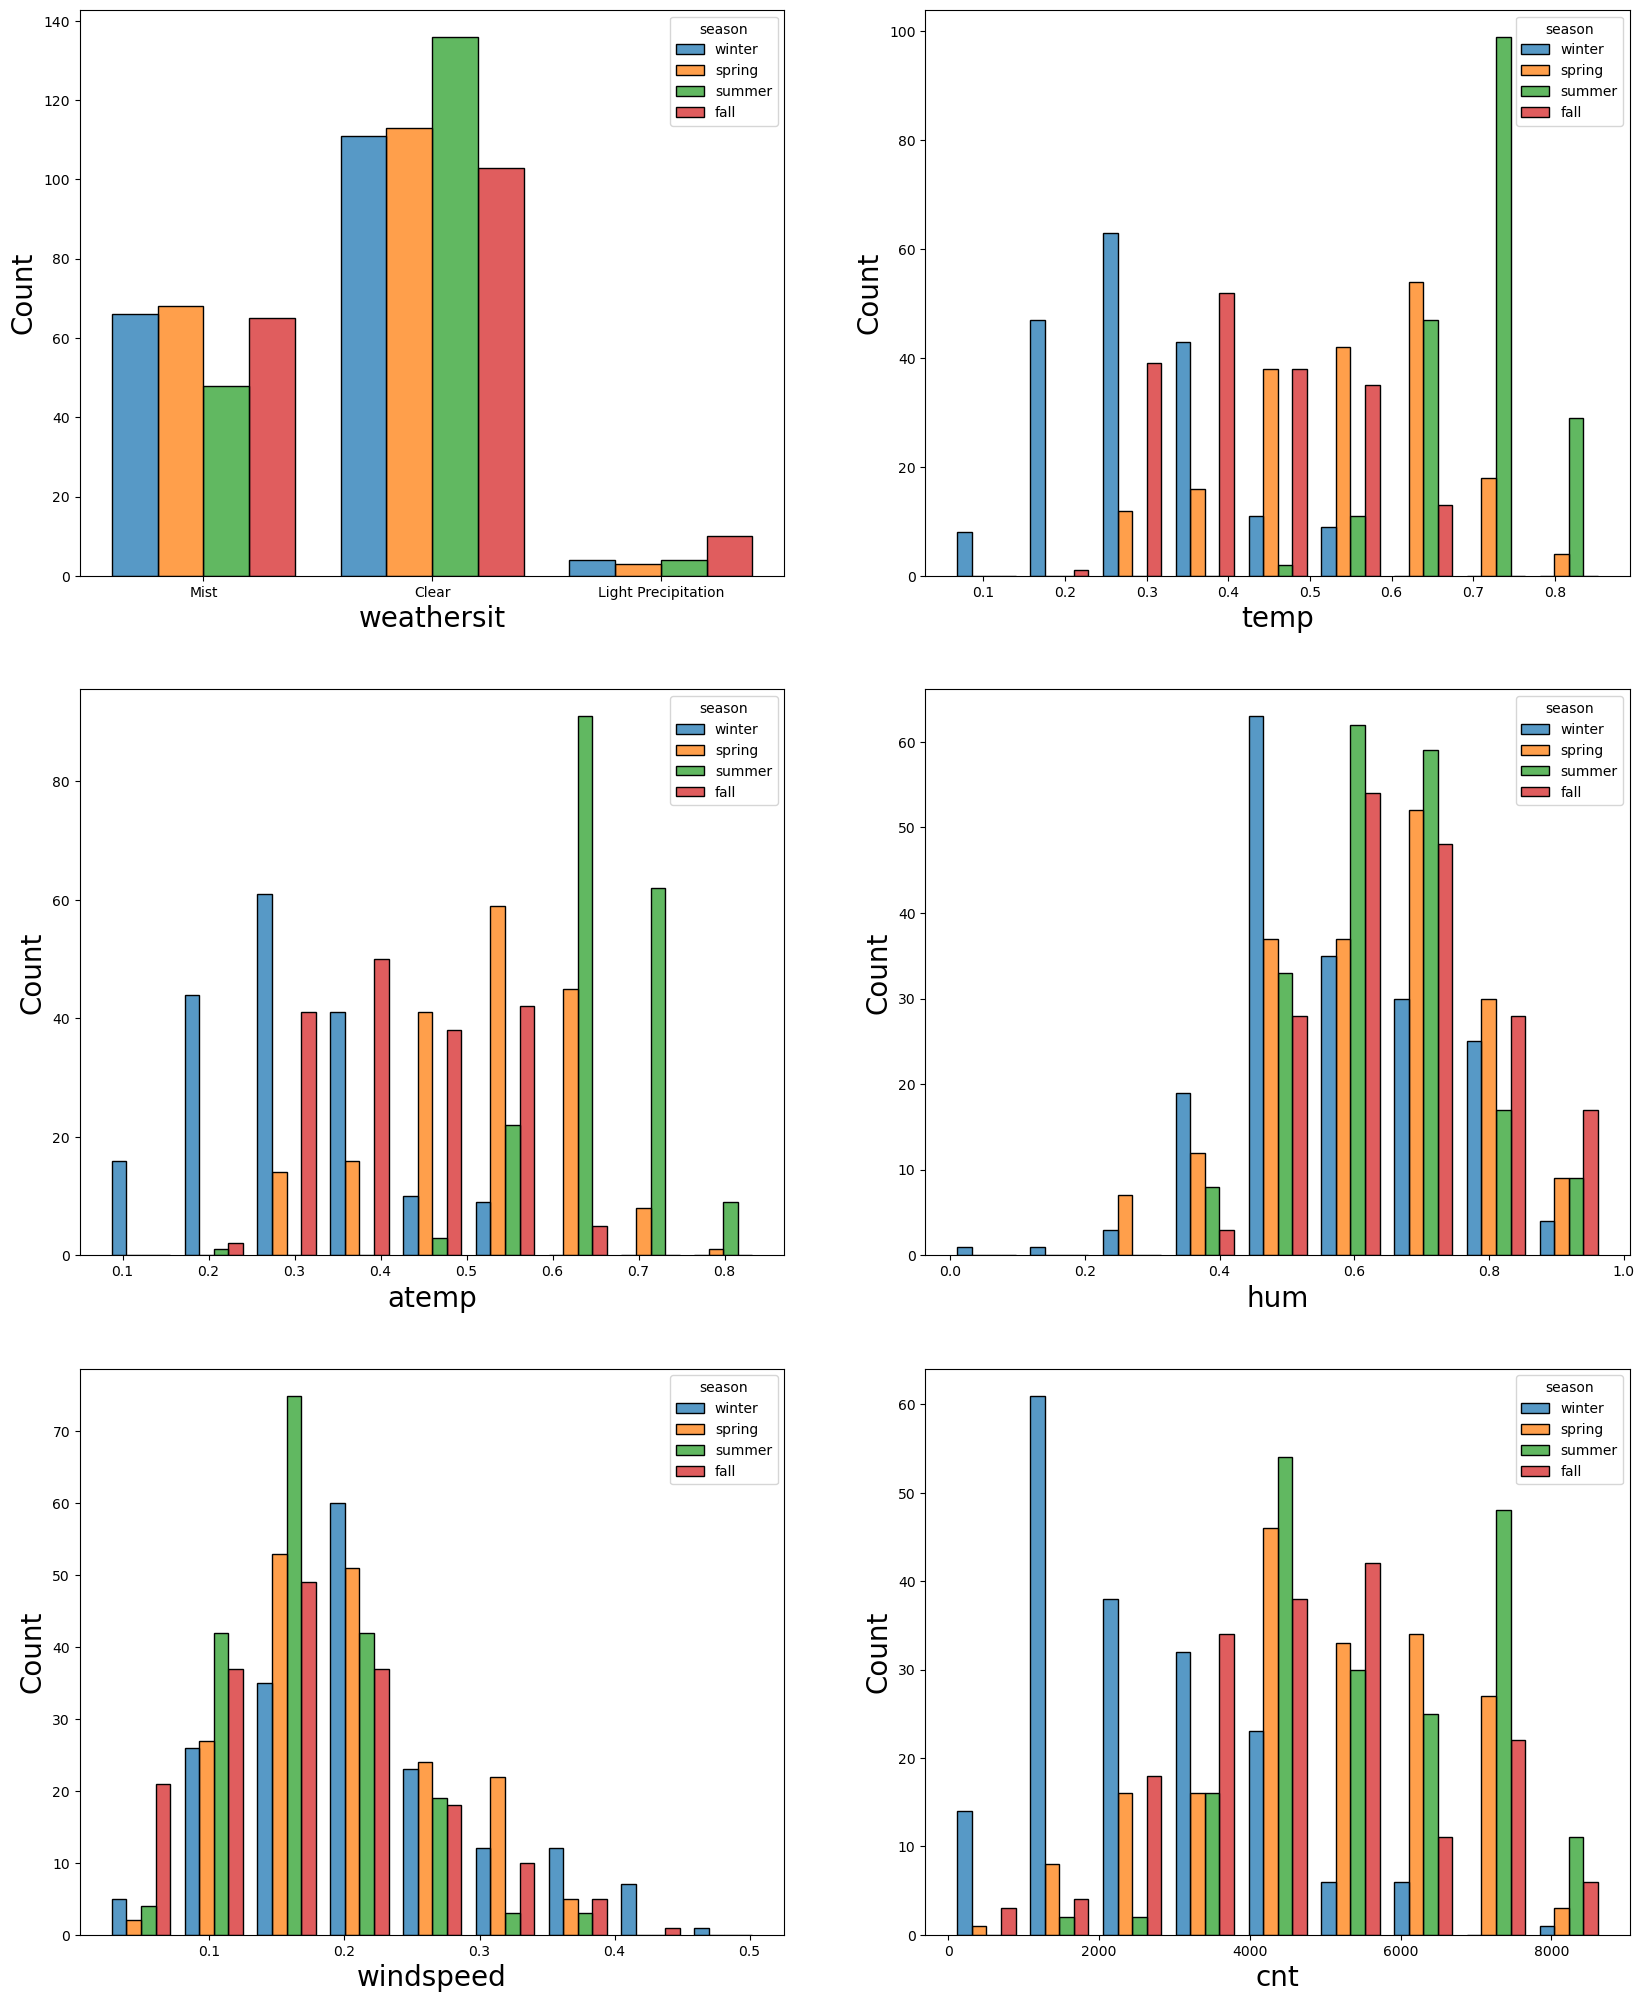

In [15]:
plt.figure(figsize=(20,25))
for num,col in enumerate(['weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']):
    ax=plt.subplot(3,2,num+1)
    sns.histplot(x=data[col],hue=data.season,bins=9,multiple="dodge", shrink=.8)
    plt.xlabel(col,fontsize=20)
    plt.ylabel('Count',fontsize=20)
plt.tight_layout;

From the above Seasonal Variation
    

 * The rental count in the summer season is probably high.
 * In the case of temp.,atemp,hum,windspeed,the rental is high in the summer season.

#### Rentals variation with weather

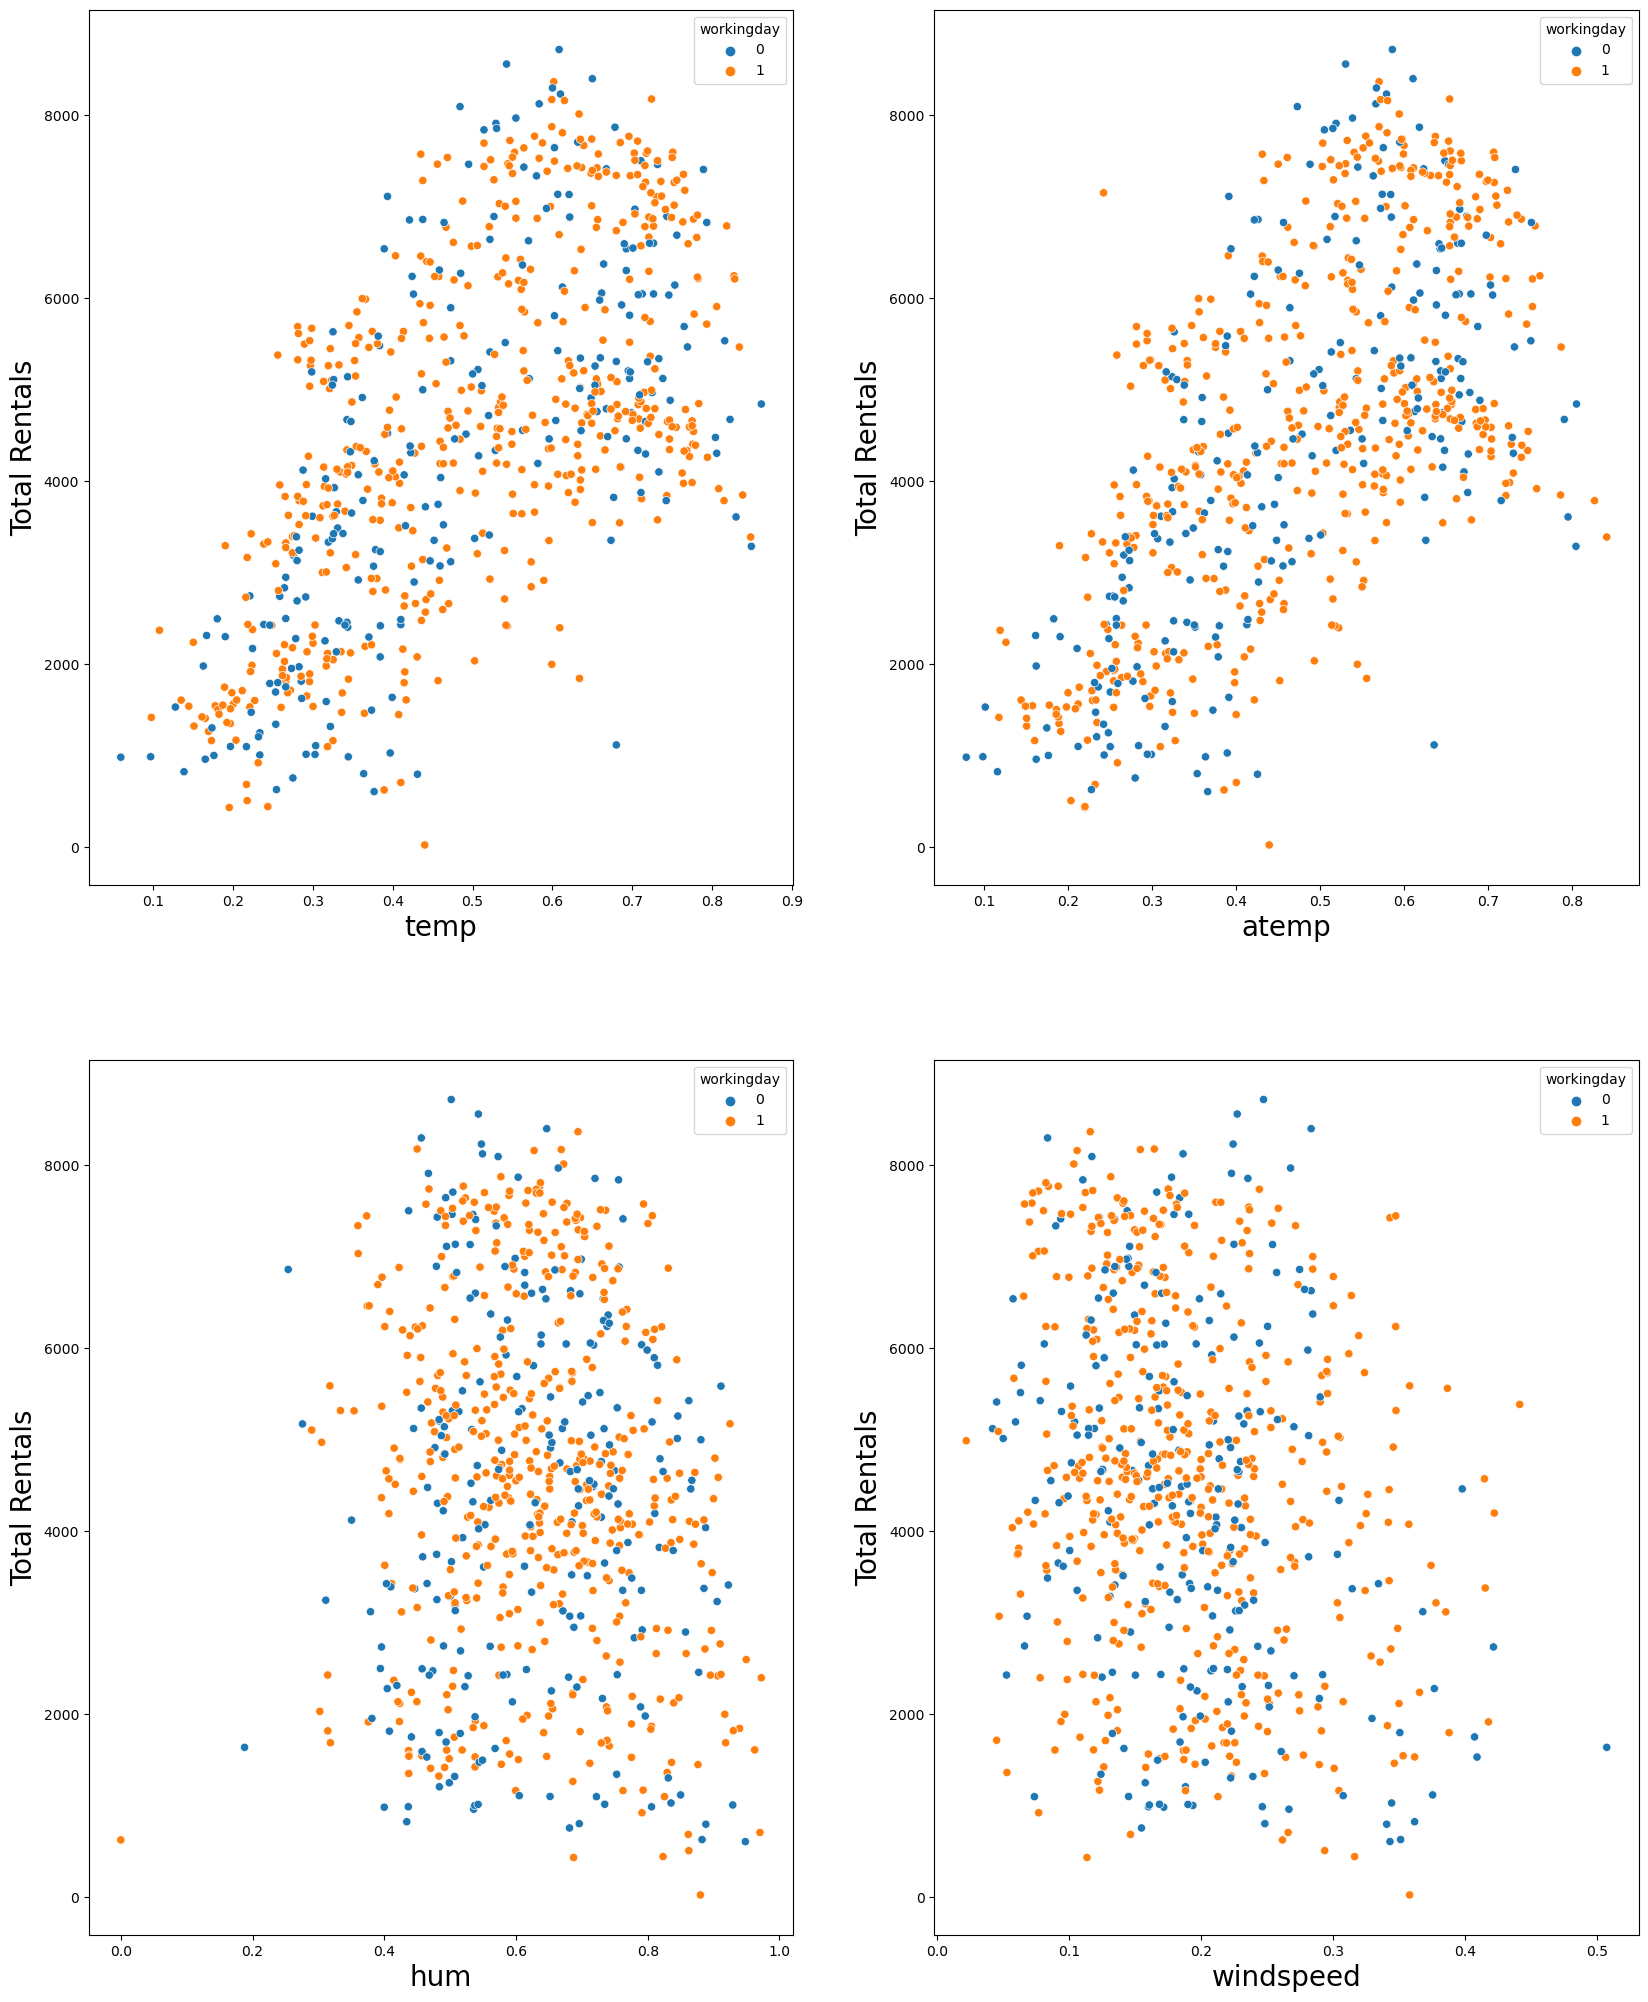

In [16]:
#Variation of rentals with weather with workingday adding in 
plt.figure(figsize=(20,25))
for num,col in enumerate(['temp', 'atemp', 'hum', 'windspeed']):
    ax=plt.subplot(2,2,num+1)
    sns.scatterplot(x=data[col],y=data.cnt,hue=data.workingday)
    plt.xlabel(col,fontsize=20)
    plt.ylabel('Total Rentals',fontsize=20)
plt.tight_layout;

### Insights

 - Rentals are highest on clear days and steeply drop if there is any precipitation.
 - Rentals are lowest in winter and highest in summer.
 - Rentals have increased in the second year. 
 - When weather is mild, there are more rentals on non working days. 
 - During extremes of weather, there are more rentals on working days. 

In [17]:
data.drop('instant', axis=1, inplace=True)

In [18]:
data.drop('dteday', axis=1, inplace=True)

In [19]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

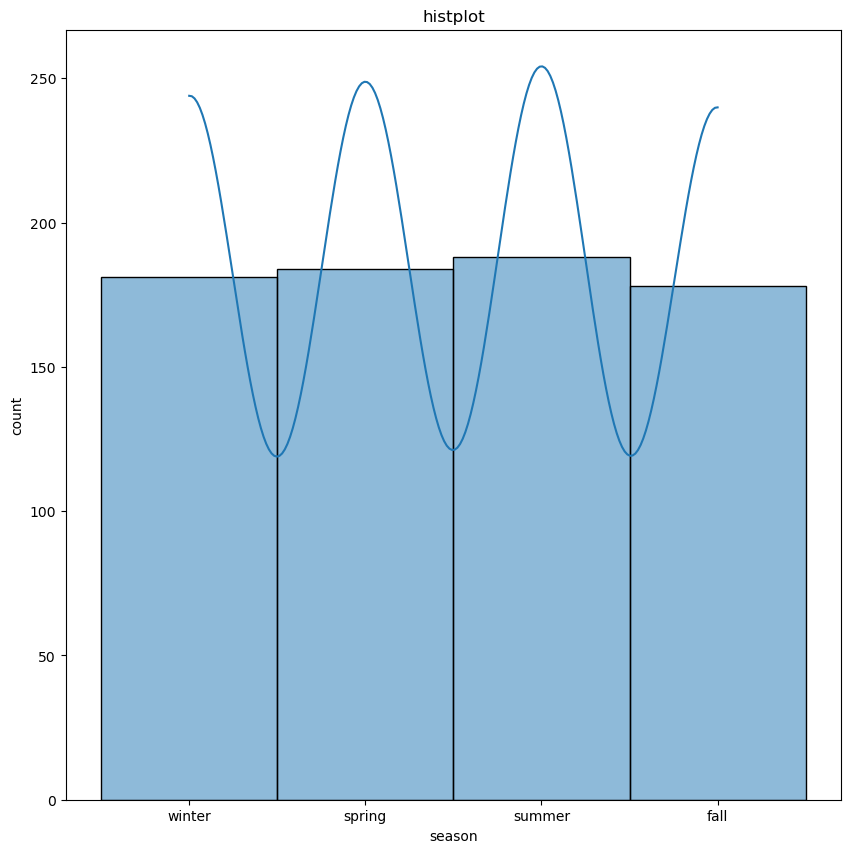

2024-03-30 12:38:30,843 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-30 12:38:30,852 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


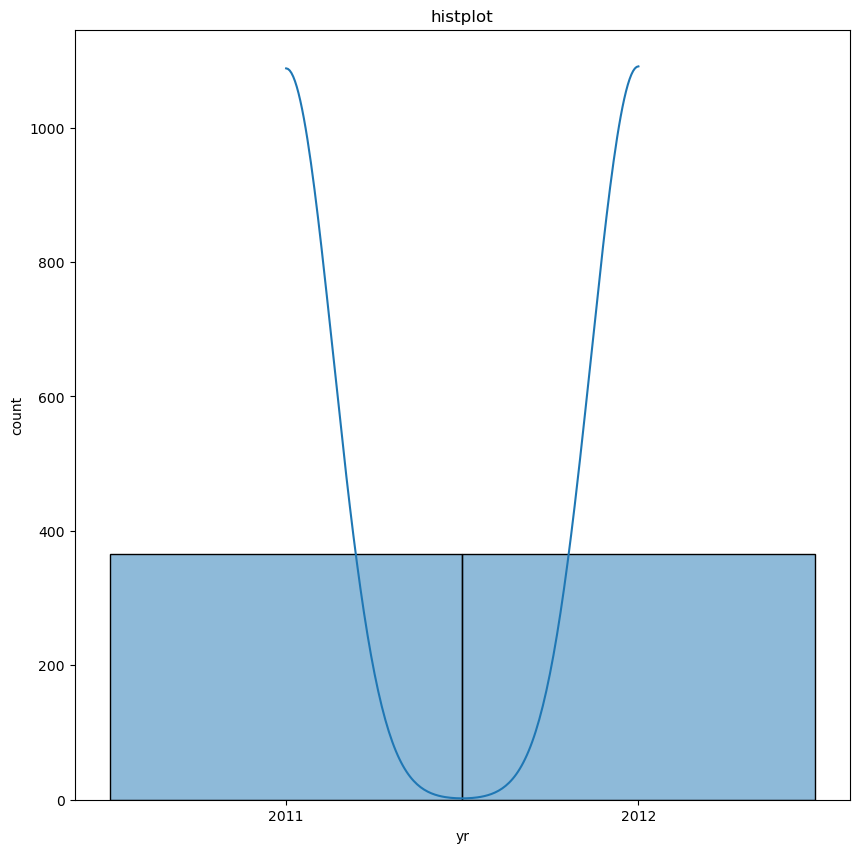

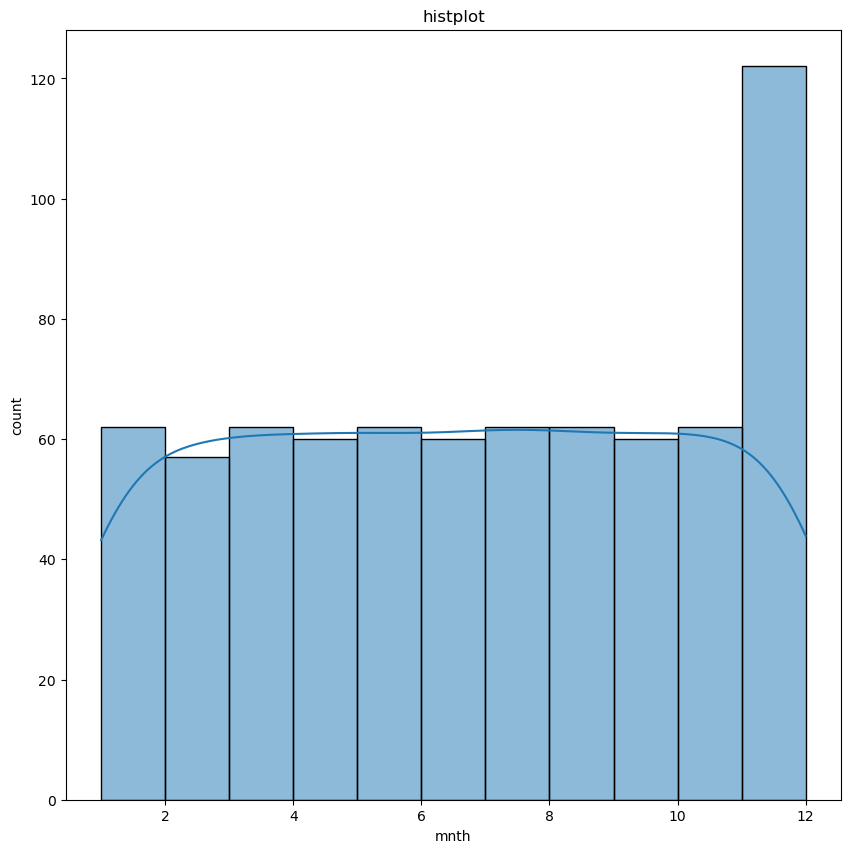

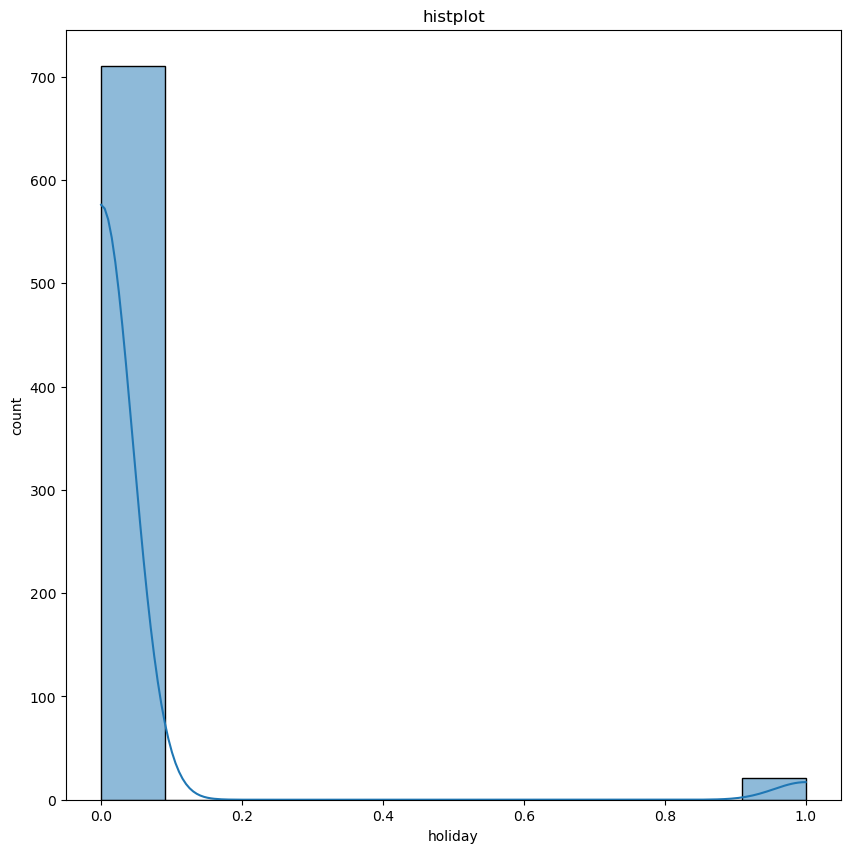

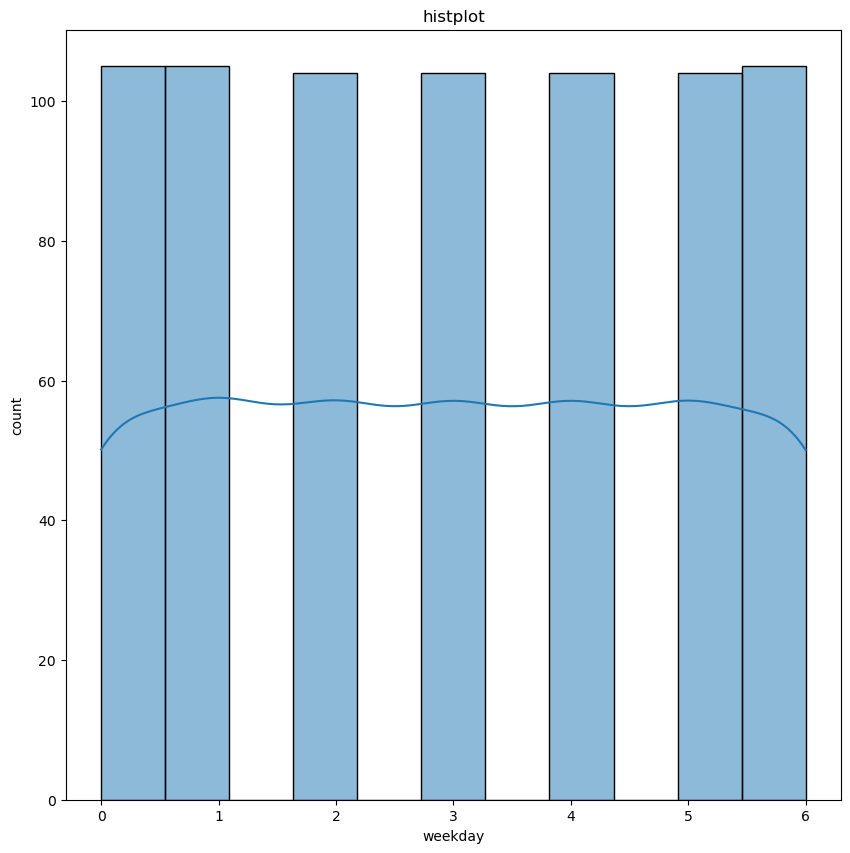

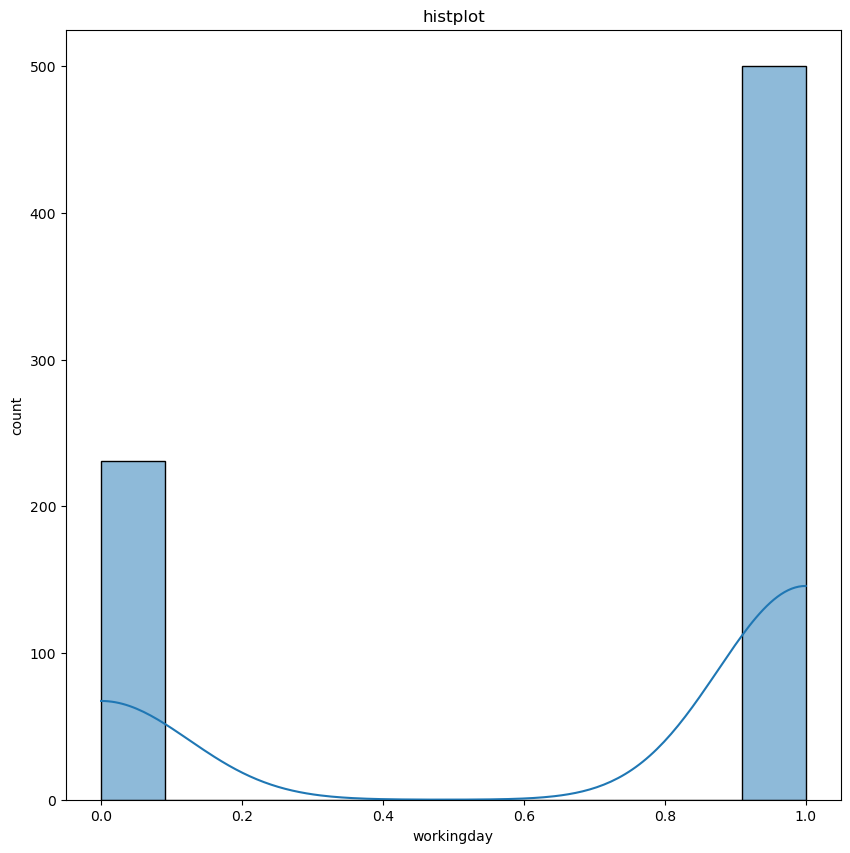

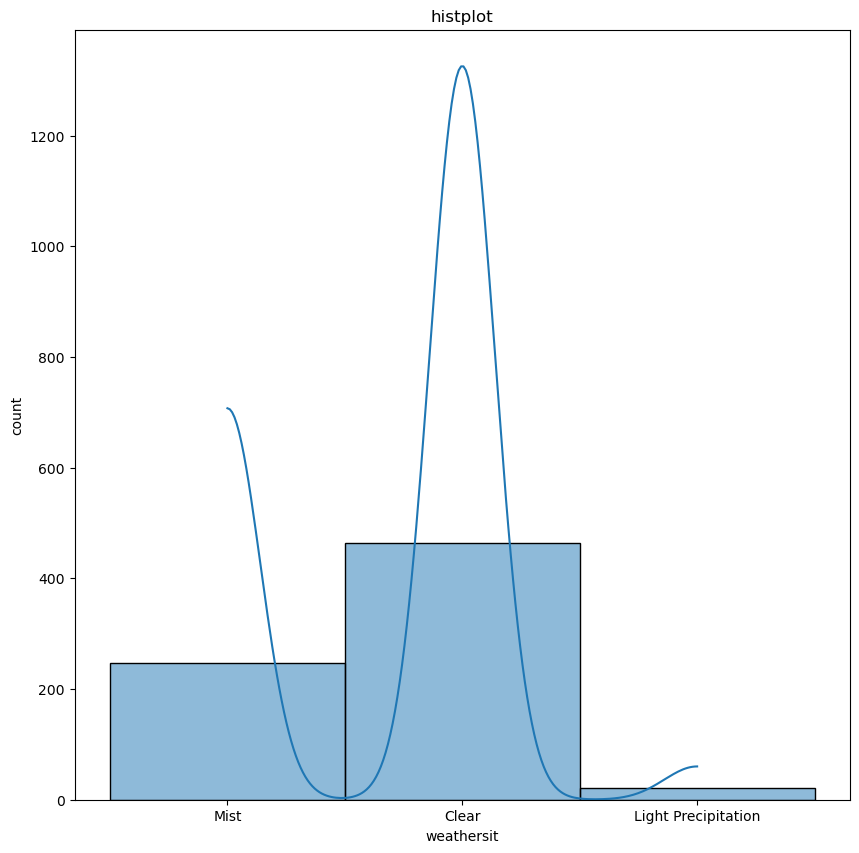

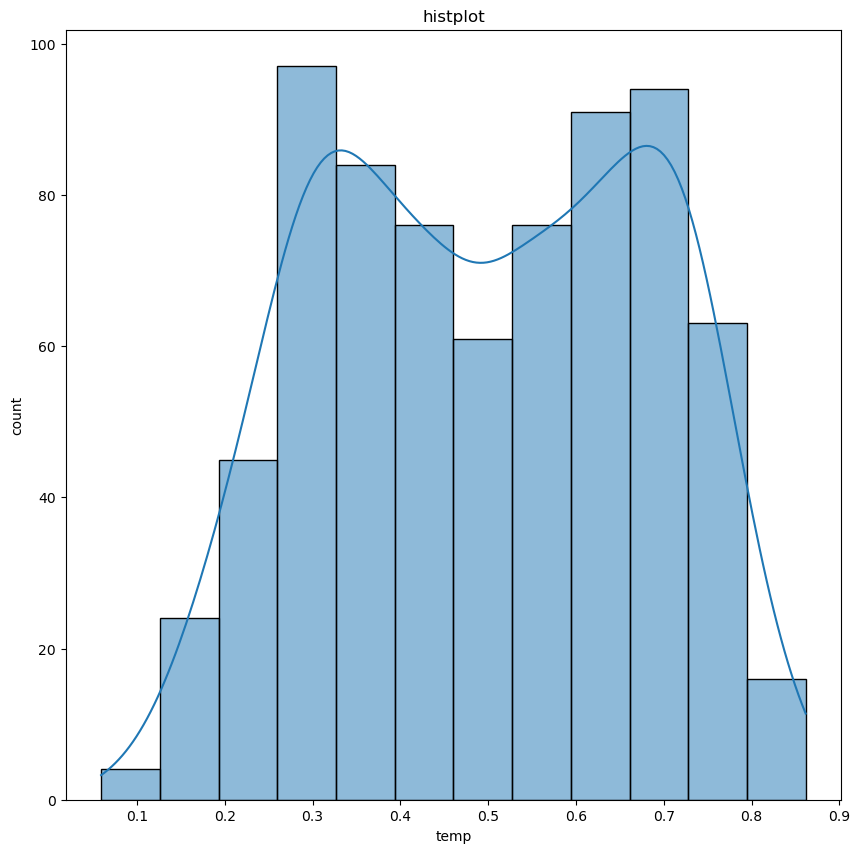

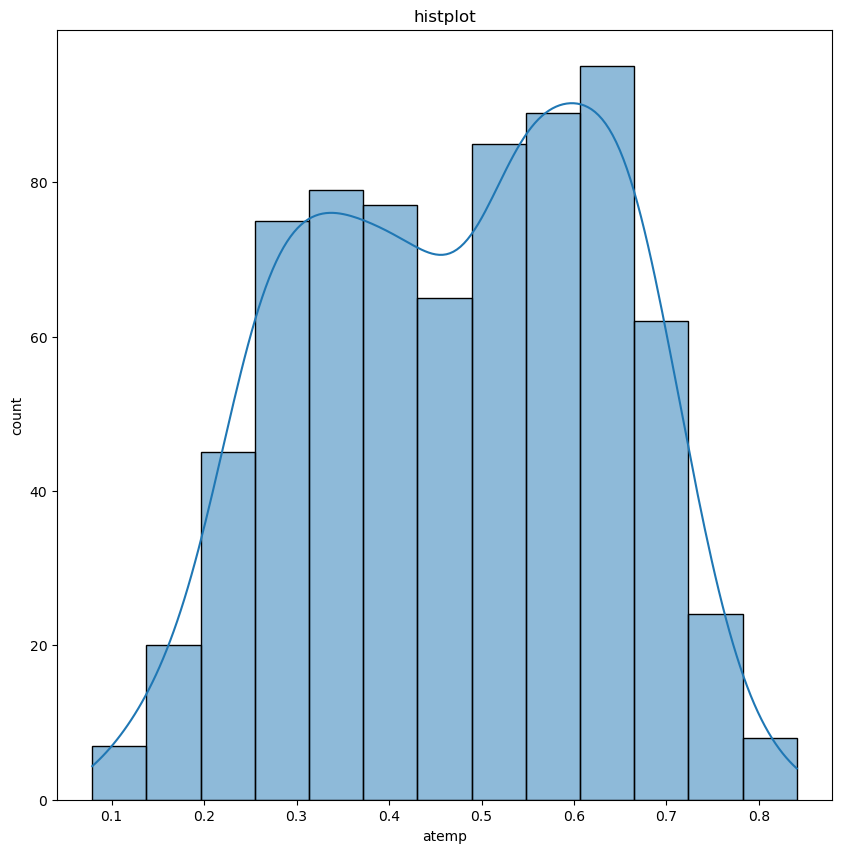

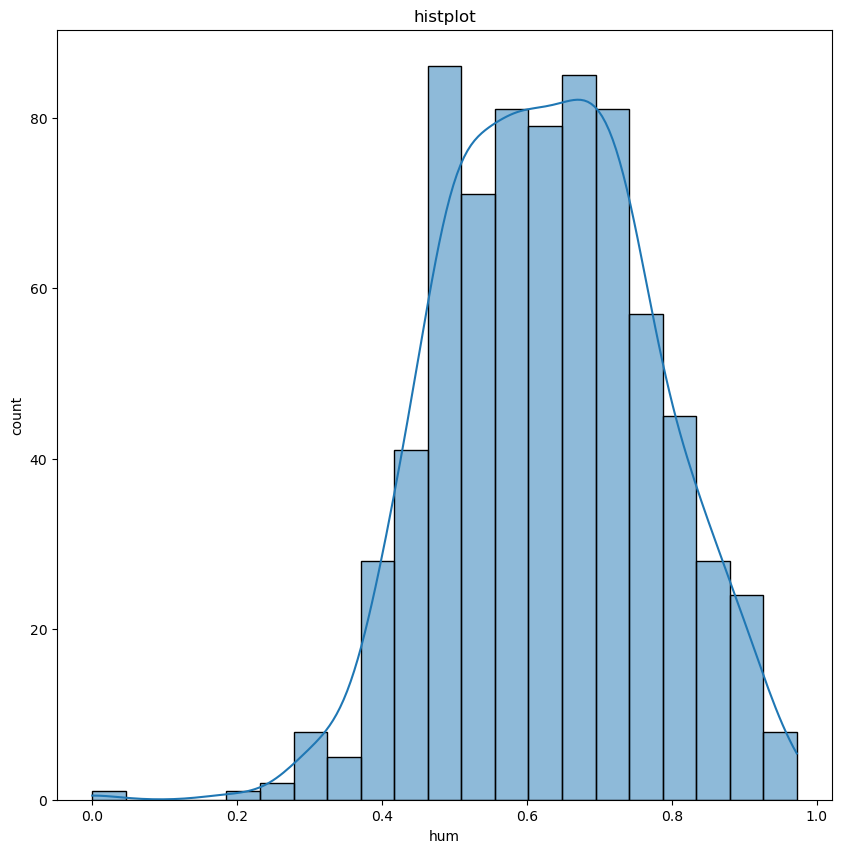

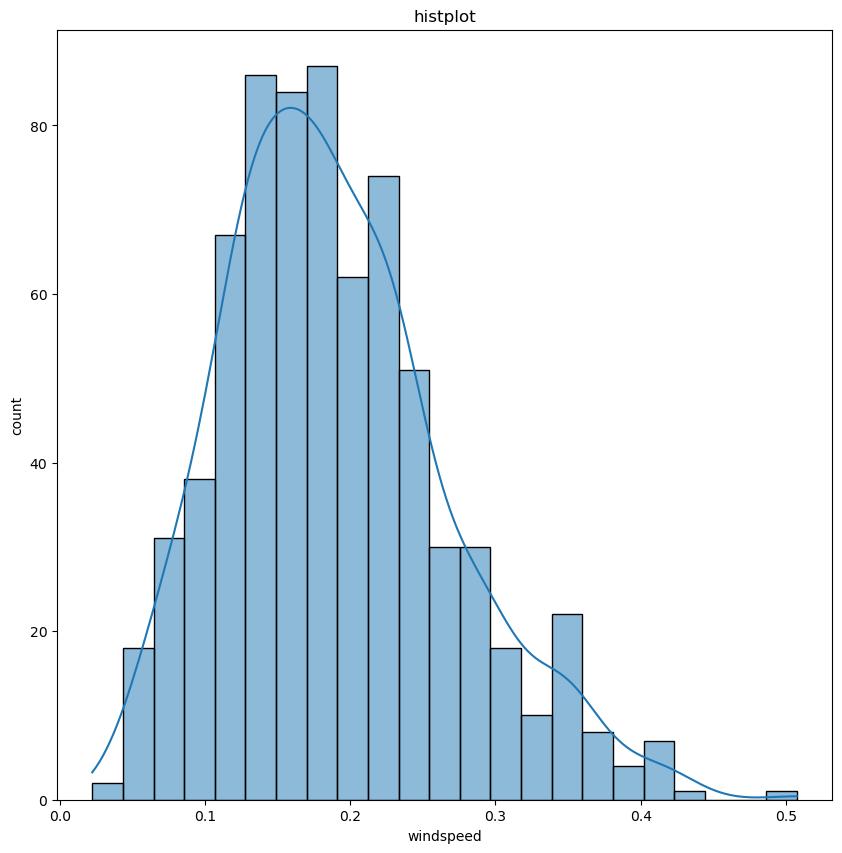

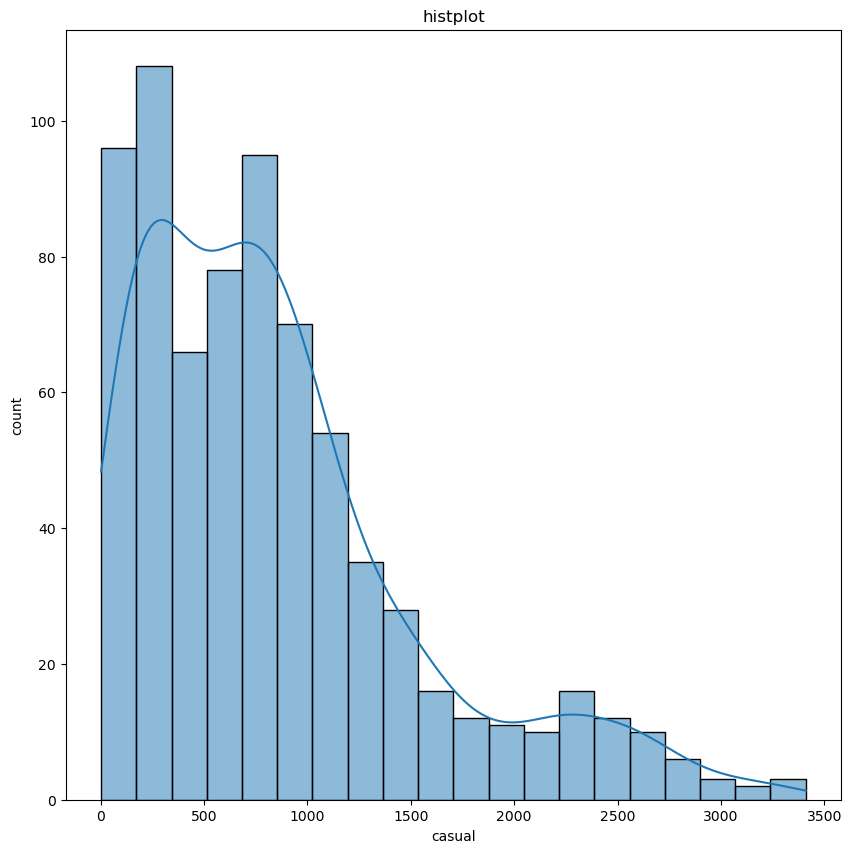

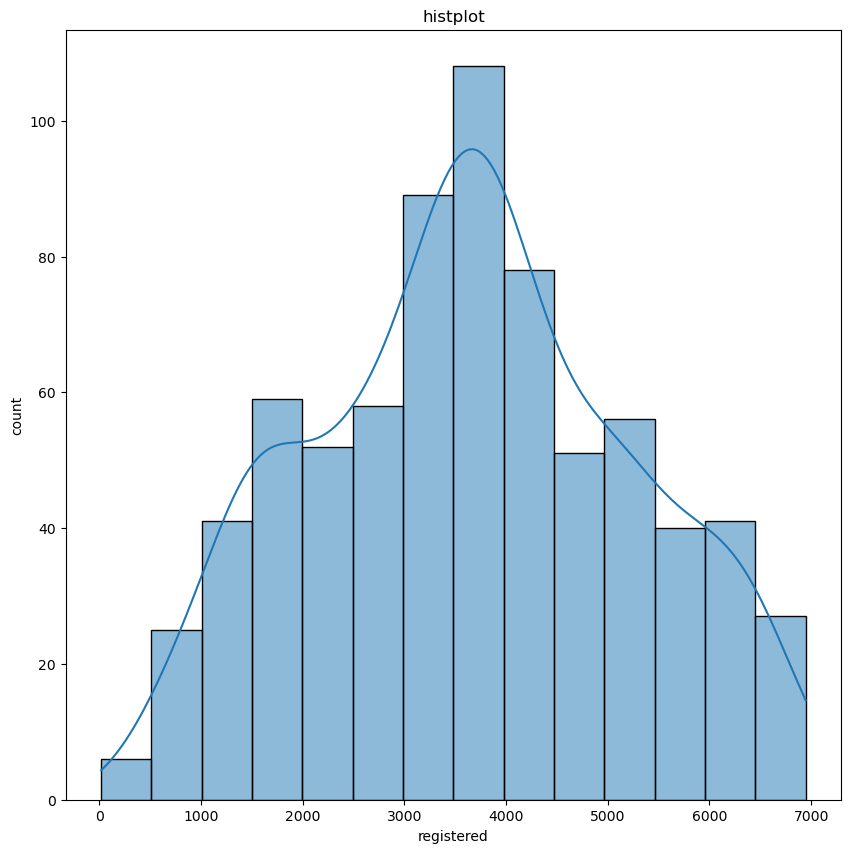

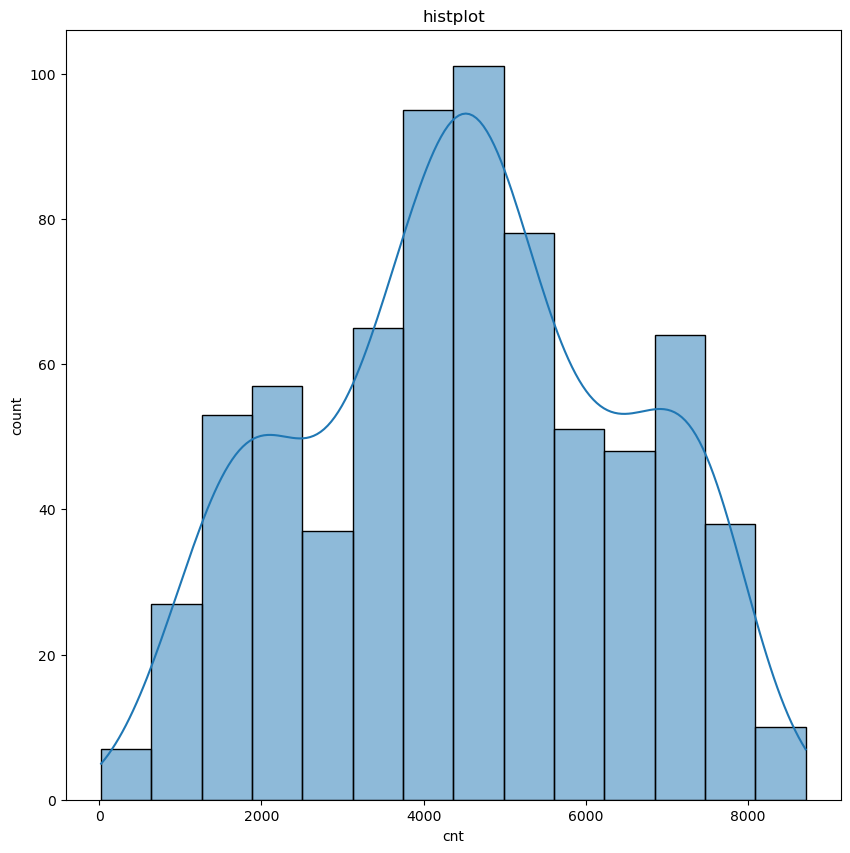

In [20]:
for i in data.columns:
    plt.figure(figsize=(10,10))
    sns.histplot(data=data, x=i, kde=True)
    plt.xlabel(i)
    plt.title('histplot')
    plt.ylabel('count')
    plt.show()

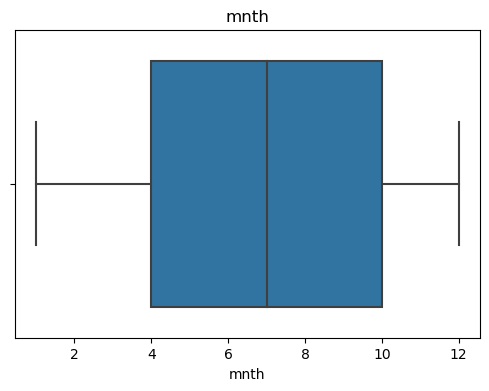

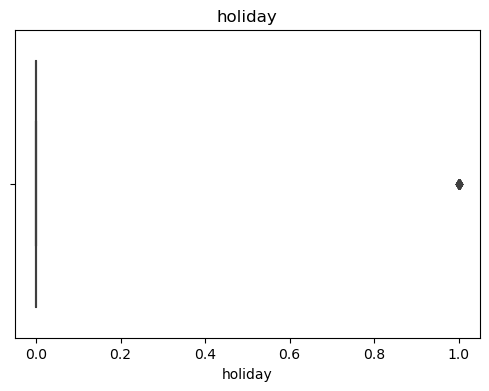

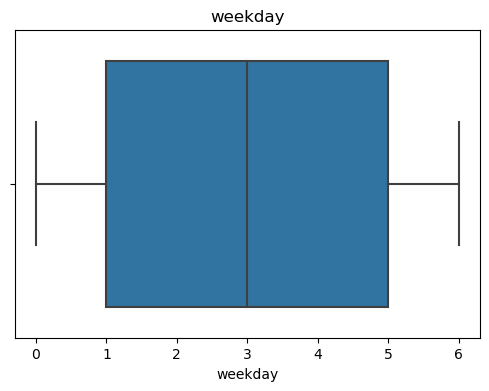

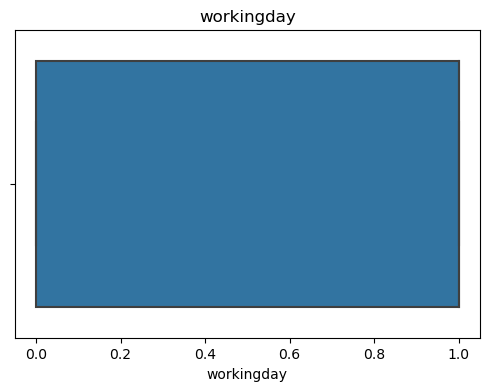

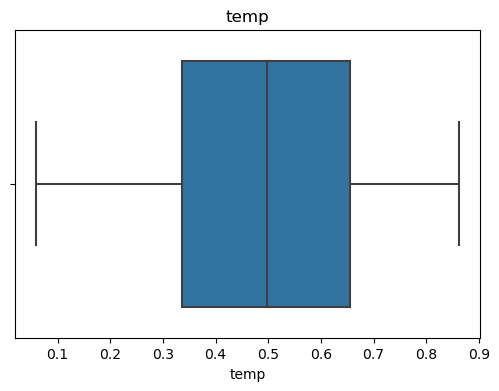

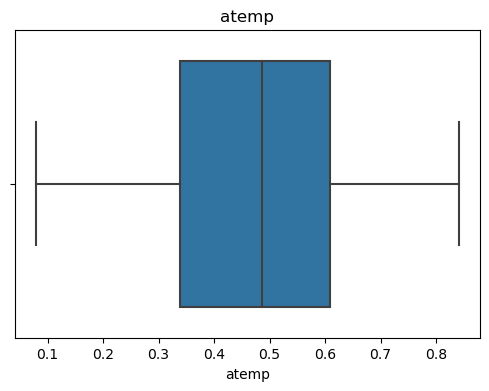

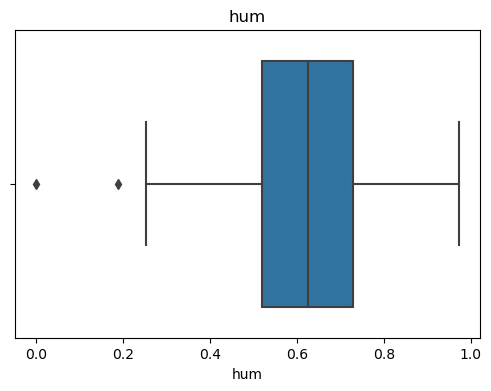

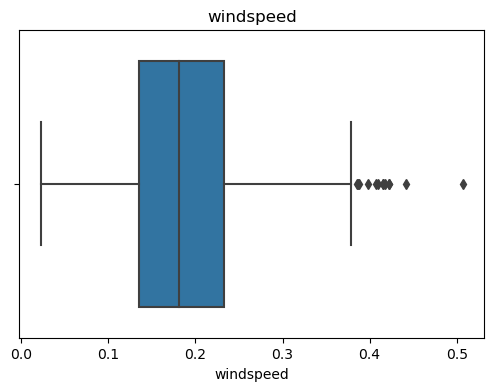

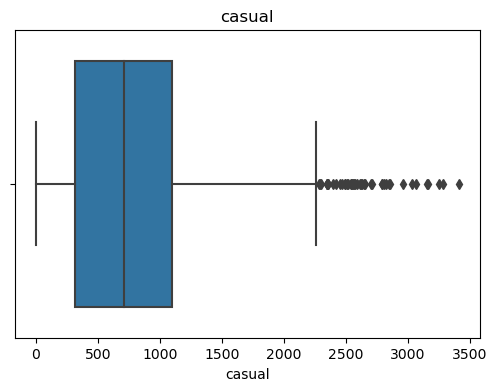

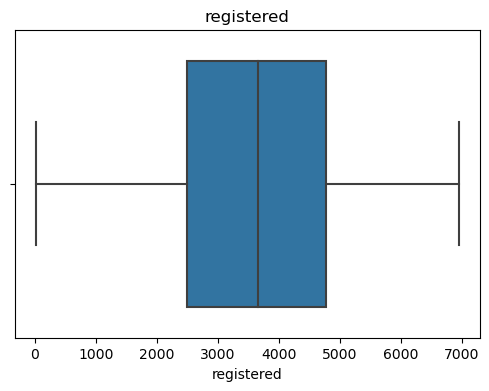

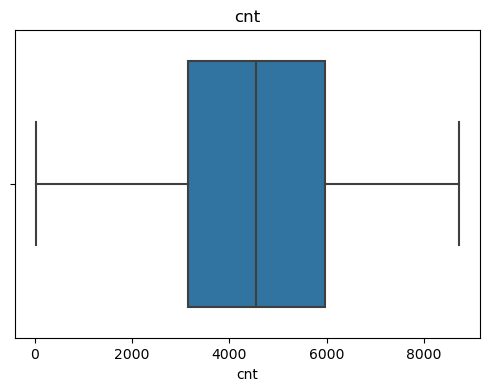

In [21]:
# To find the outliers
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:  # Check if column is numeric
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=data, x=col)
        plt.title(col)
        plt.xlabel(col)
        plt.show()

In [22]:
data.hum

0      0.805833
1      0.696087
2      0.437273
3      0.590435
4      0.436957
         ...   
726    0.652917
727    0.590000
728    0.752917
729    0.483333
730    0.577500
Name: hum, Length: 731, dtype: float64

# Hum

In [23]:
# Assuming 'data' is your DataFrame and 'hum' is the column with outliers
# Calculate quartile 1 and quartile 3
q1 = data['hum'].quantile(0.25)
q3 = data['hum'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Identify the outliers using the IQR method
outliers = data[(data['hum'] < q1 - 1.5 * iqr) | (data['hum'] > q3 + 1.5 * iqr)]

outliers

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,winter,2011,2,0,6,0,Clear,0.399167,0.391404,0.187917,0.507463,532,1103,1635
68,winter,2011,3,0,4,1,Light Precipitation,0.389091,0.385668,0.000000,0.261877,46,577,623


In [24]:
data['hum'].median()

0.626667

In [25]:
# replace the outliers with median
data.loc[[49,68], 'hum'] = 0.626667

In [26]:
data.loc[[49,68]]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,winter,2011,2,0,6,0,Clear,0.399167,0.391404,0.626667,0.507463,532,1103,1635
68,winter,2011,3,0,4,1,Light Precipitation,0.389091,0.385668,0.626667,0.261877,46,577,623


<Axes: xlabel='hum'>

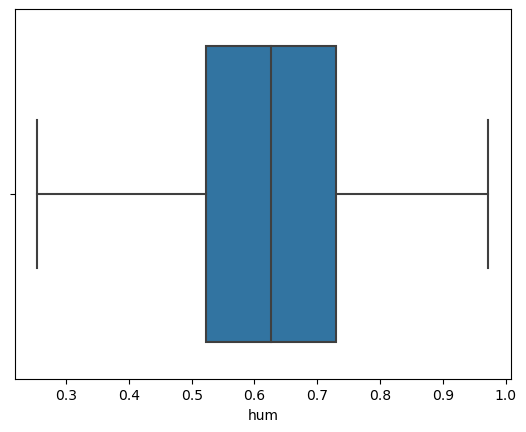

In [27]:
sns.boxplot(data=data, x=data.hum)

# windspeed

In [28]:
# Assuming 'data' is your DataFrame and 'hum' is the column with outliers
# Calculate quartile 1 and quartile 3
q1 = data['windspeed'].quantile(0.25)
q3 = data['windspeed'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Identify the outliers using the IQR method
outliers = data[(data['windspeed'] < q1 - 1.5 * iqr) | (data['windspeed'] > q3 + 1.5 * iqr)]

outliers

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,winter,2011,2,0,1,1,Clear,0.415000,0.398350,0.375833,0.417908,208,1705,1913
49,winter,2011,2,0,6,0,Clear,0.399167,0.391404,0.626667,0.507463,532,1103,1635
93,spring,2011,4,0,1,1,Clear,0.573333,0.542929,0.426250,0.385571,734,2381,3115
94,spring,2011,4,0,2,1,Mist,0.414167,0.398350,0.642083,0.388067,167,1628,1795
292,fall,2011,10,0,4,1,Clear,0.475833,0.466525,0.636250,0.422275,471,3724,4195
382,winter,2012,1,0,3,1,Clear,0.303333,0.275254,0.443333,0.415429,109,3267,3376
407,winter,2012,2,0,0,0,Clear,0.127500,0.101658,0.464583,0.409212,73,1456,1529
420,winter,2012,2,0,6,0,Clear,0.290833,0.255675,0.395833,0.421642,317,2415,2732
432,winter,2012,3,0,4,1,Clear,0.527500,0.524604,0.567500,0.441563,486,4896,5382
433,winter,2012,3,0,5,1,Mist,0.410833,0.397083,0.407083,0.414800,447,4122,4569


In [29]:
data.windspeed.median() # find median to replace outlier

0.180975

In [30]:
data.loc[[44,49,93,94,292,382,407,420,432,433,450,666,721], 'windspeed'] = 0.180975

In [31]:
data.loc[[44,49,93,94,292,382,407,420,432,433,450,666,721]]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,winter,2011,2,0,1,1,Clear,0.415000,0.398350,0.375833,0.180975,208,1705,1913
49,winter,2011,2,0,6,0,Clear,0.399167,0.391404,0.626667,0.180975,532,1103,1635
93,spring,2011,4,0,1,1,Clear,0.573333,0.542929,0.426250,0.180975,734,2381,3115
94,spring,2011,4,0,2,1,Mist,0.414167,0.398350,0.642083,0.180975,167,1628,1795
292,fall,2011,10,0,4,1,Clear,0.475833,0.466525,0.636250,0.180975,471,3724,4195
382,winter,2012,1,0,3,1,Clear,0.303333,0.275254,0.443333,0.180975,109,3267,3376
407,winter,2012,2,0,0,0,Clear,0.127500,0.101658,0.464583,0.180975,73,1456,1529
420,winter,2012,2,0,6,0,Clear,0.290833,0.255675,0.395833,0.180975,317,2415,2732
432,winter,2012,3,0,4,1,Clear,0.527500,0.524604,0.567500,0.180975,486,4896,5382
433,winter,2012,3,0,5,1,Mist,0.410833,0.397083,0.407083,0.180975,447,4122,4569


<Axes: xlabel='windspeed'>

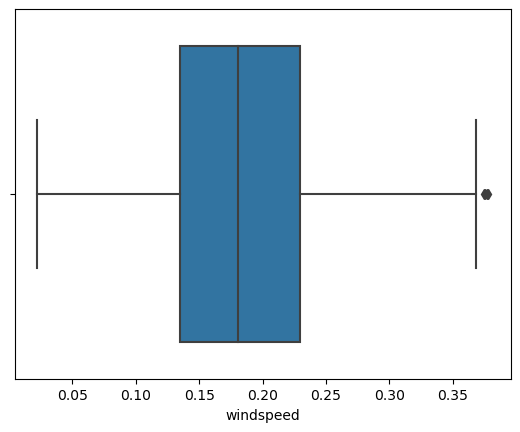

In [32]:
sns.boxplot(data=data, x=data.windspeed)

In [33]:
# Assuming 'data' is your DataFrame and 'hum' is the column with outliers
# Calculate quartile 1 and quartile 3
q1 = data['windspeed'].quantile(0.25)
q3 = data['windspeed'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Identify the outliers using the IQR method
outliers = data[(data['windspeed'] < q1 - 1.5 * iqr) | (data['windspeed'] > q3 + 1.5 * iqr)]

outliers

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
238,summer,2011,8,0,6,0,Mist,0.680000,0.635556,0.850000,0.375617,226,889,1115
377,winter,2012,1,0,5,1,Clear,0.274167,0.249362,0.507500,0.378108,174,3040,3214
693,fall,2012,11,0,6,0,Clear,0.278333,0.248742,0.404583,0.376871,532,1745,2277
720,winter,2012,12,0,5,1,Mist,0.326667,0.301767,0.556667,0.374383,221,3402,3623


In [34]:
data.loc[[238,377,693,720], 'windspeed'] = 0.180975

<Axes: xlabel='windspeed'>

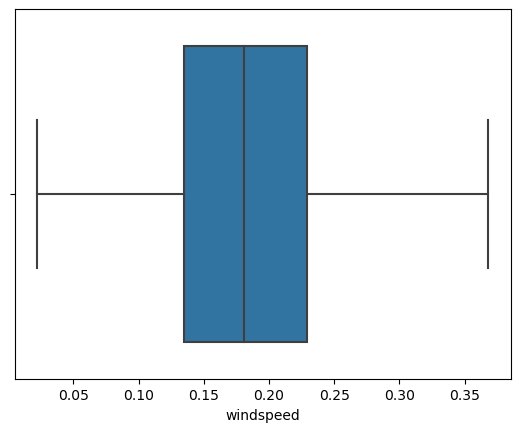

In [35]:
sns.boxplot(data=data, x=data.windspeed)

In [36]:
data.drop('casual', axis=1, inplace=True)

In [37]:
data.drop('registered', axis=1, inplace=True)

In [38]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

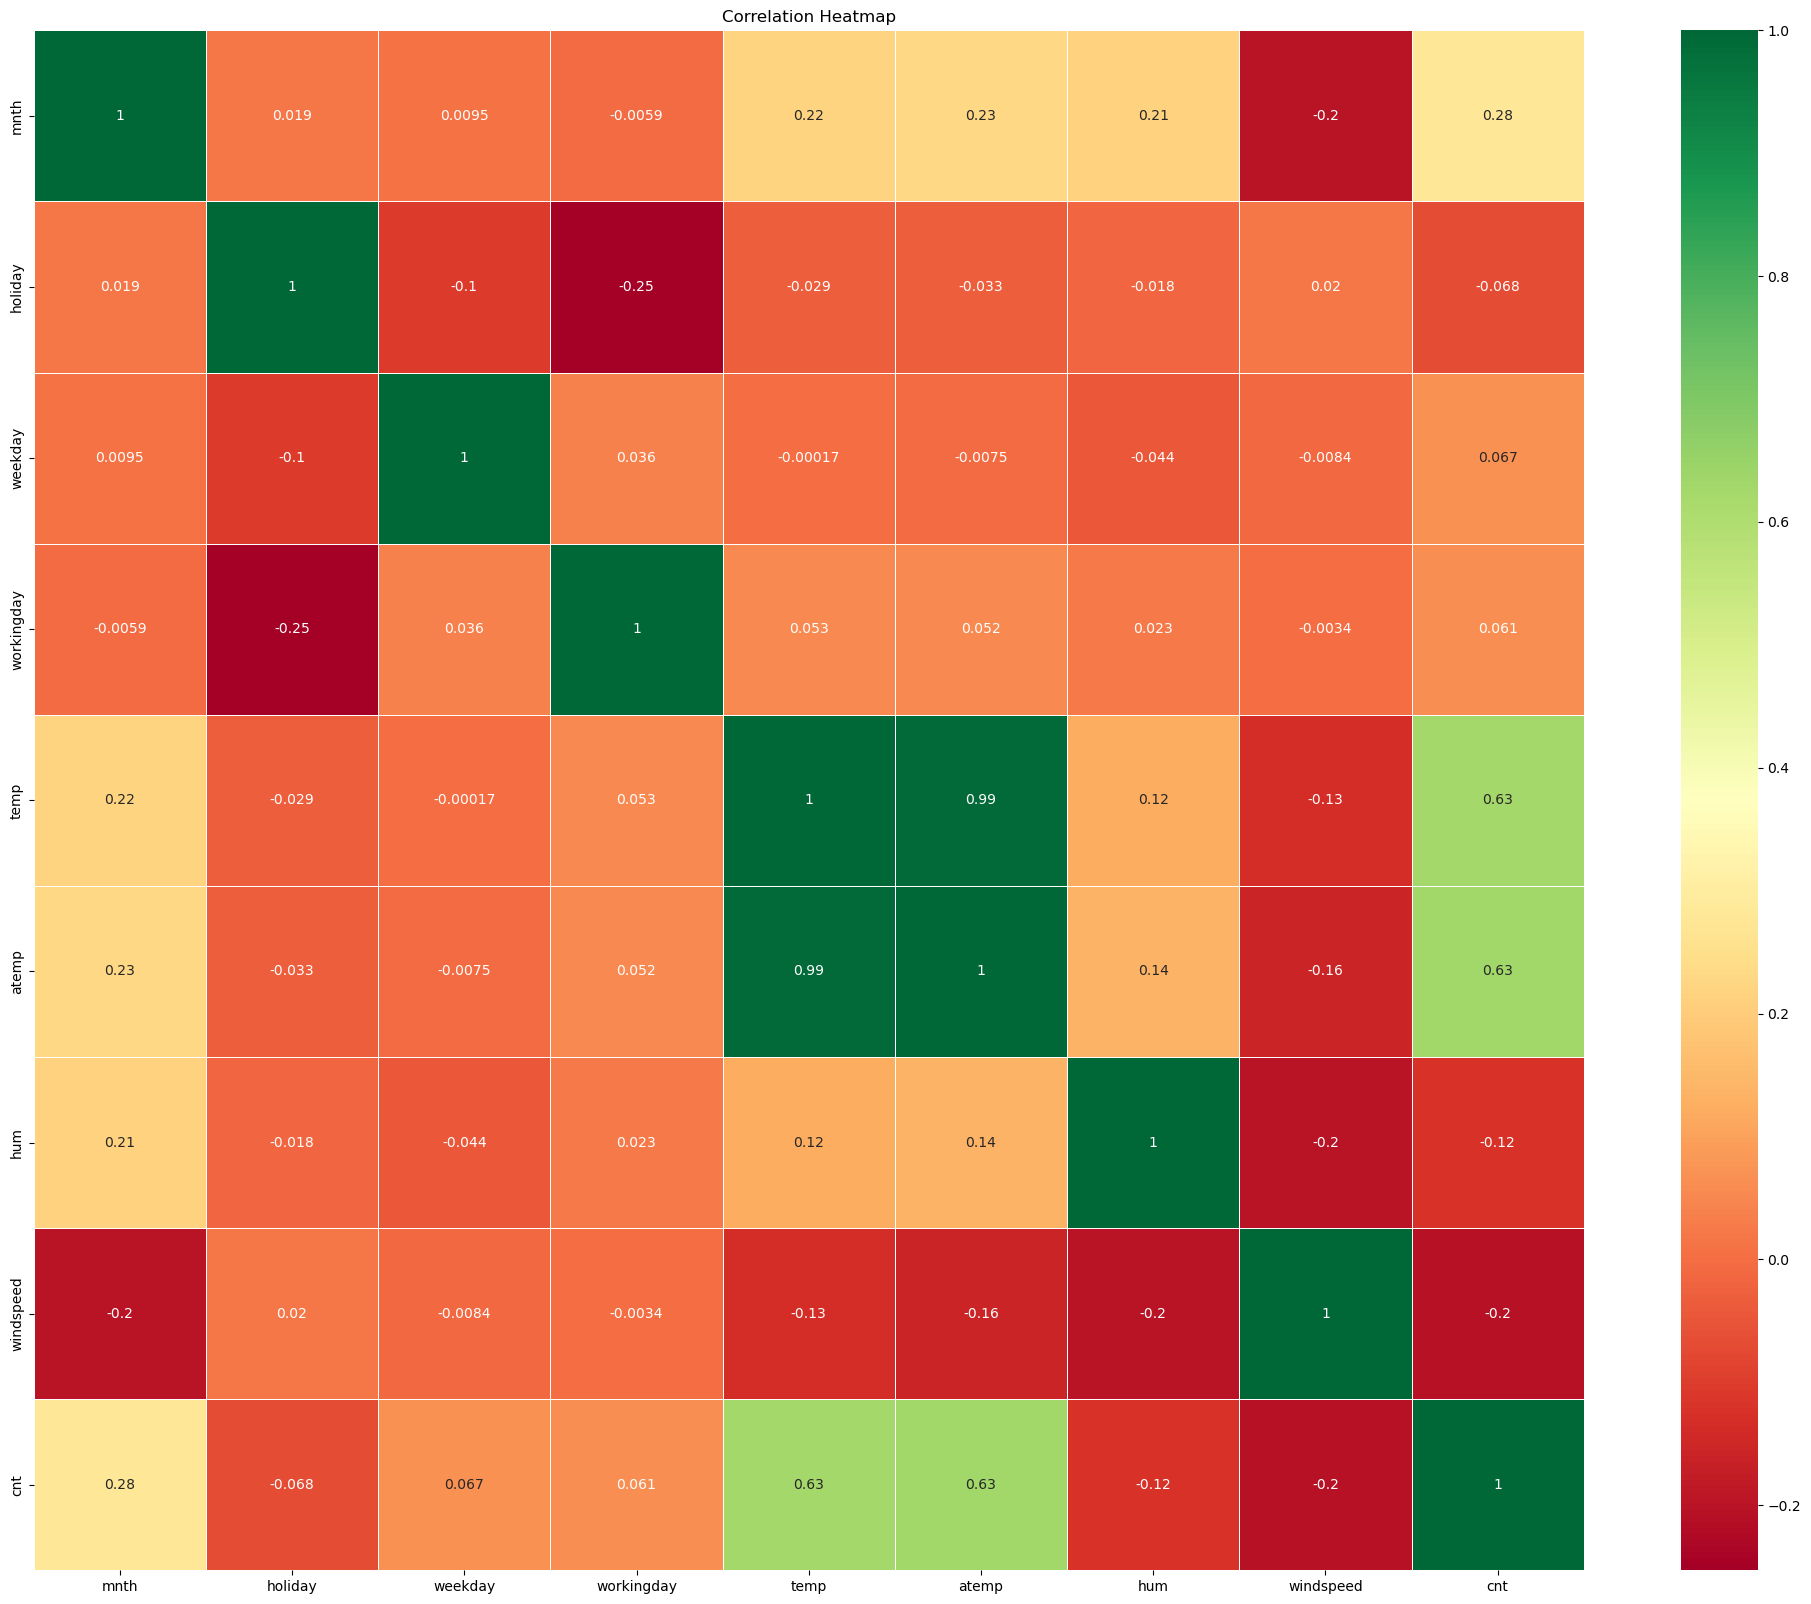

In [39]:
# Assuming 'data' is your DataFrame
# Fill missing values if any
data.fillna(0, inplace=True)  # Fill NaNs with 0, adjust as needed

# Convert categorical columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['season', 'yr', 'weathersit'])  # Adjust columns as needed

# Select only numeric columns for correlation calculation
numeric_columns = data_encoded.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


* From the correlation table,temp and atemp has high correlation 

In [40]:
correlation = data['temp'].corr(data['atemp'])

In [41]:
correlation

0.9917015532294641

In [42]:
data.drop('atemp', axis=1, inplace=True)

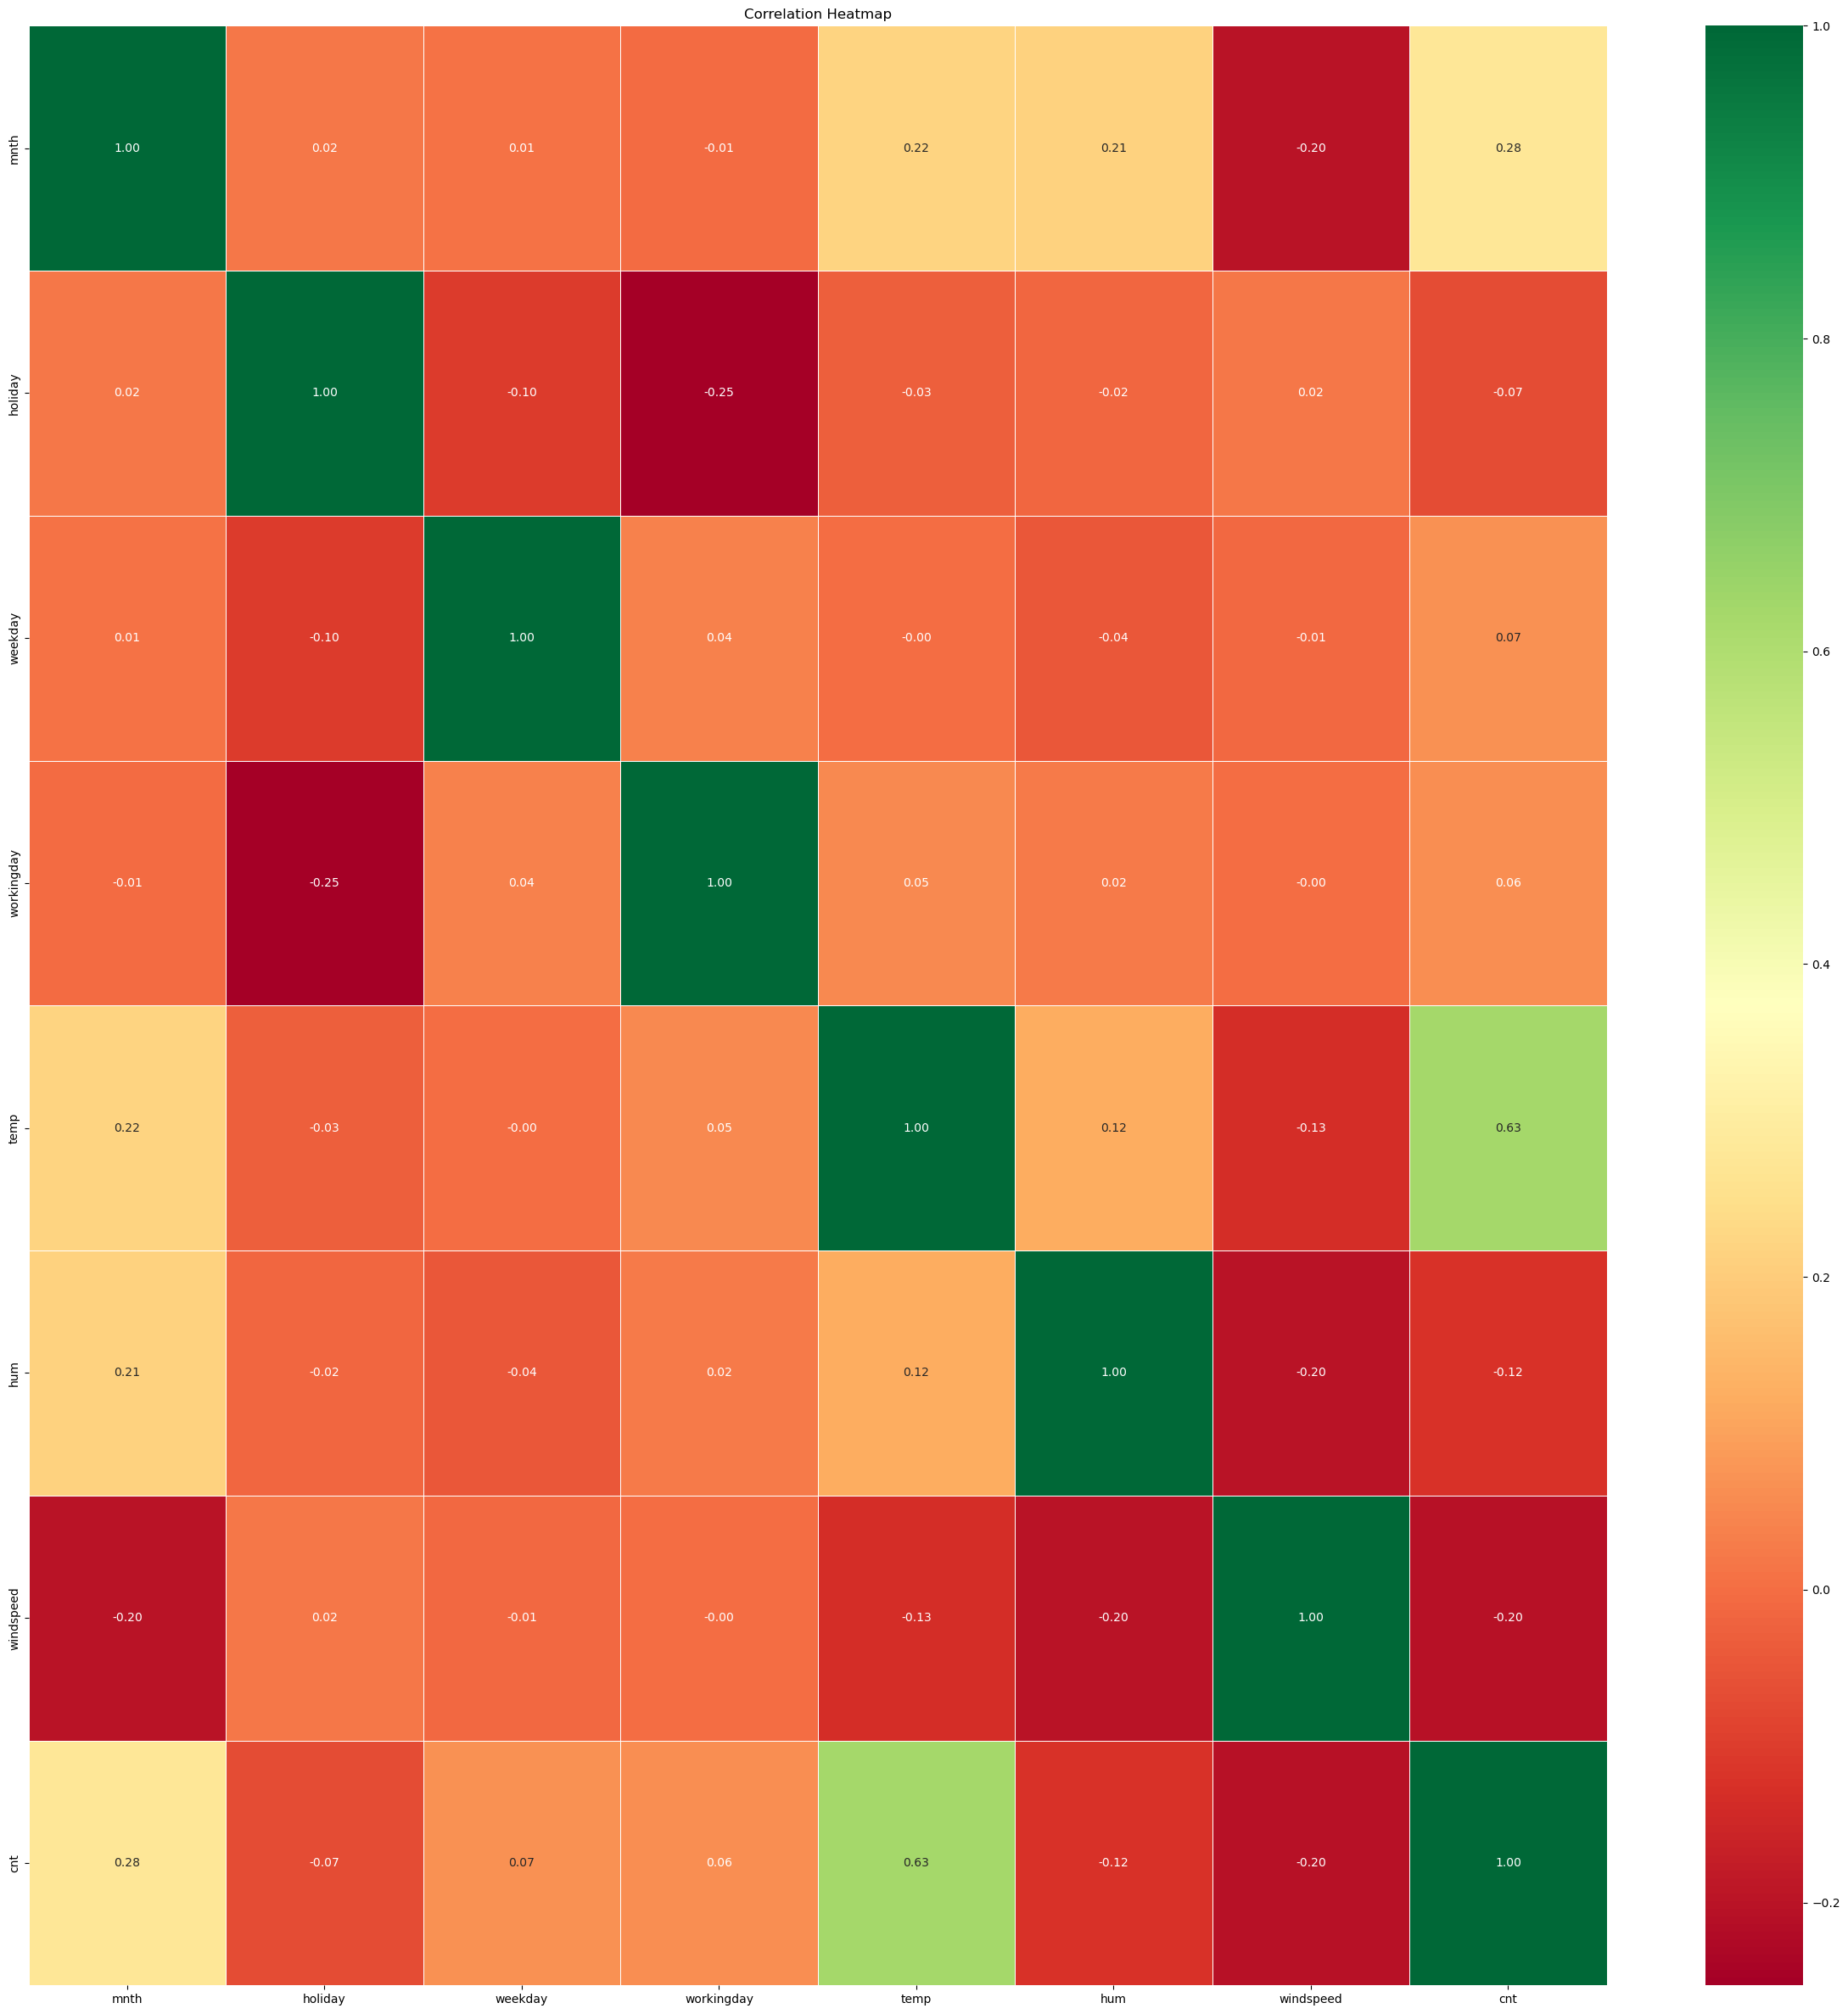

In [43]:

# Select only numeric columns for correlation calculation
numeric_columns = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdYlGn', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [44]:
import numpy as np
import pandas as pd

# Assuming data is your pandas DataFrame
columns_to_transform = ['temp',  'hum', 'windspeed']

for column in columns_to_transform:
    data[column] = np.log(data[column] + 1)  # Adding 1 to handle zero and negative values

# You might want to check if the transformation is successful and visually inspect the changes.
# You can use histograms or Q-Q plots to visualize the distributions before and after transformation.


2024-03-30 12:38:42,988 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-30 12:38:42,994 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


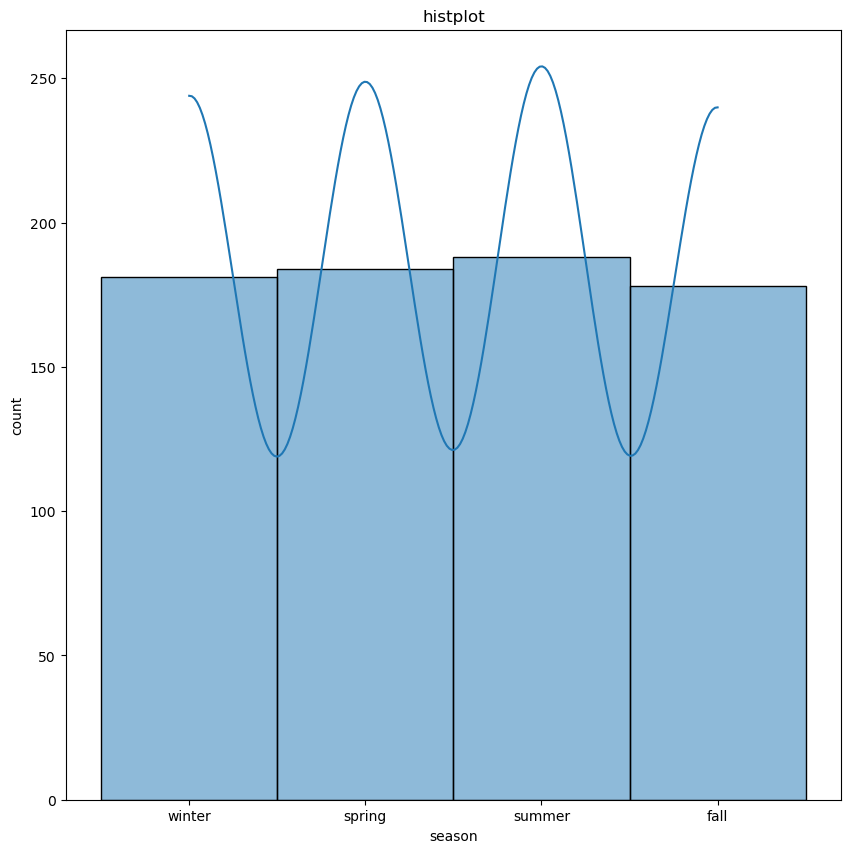

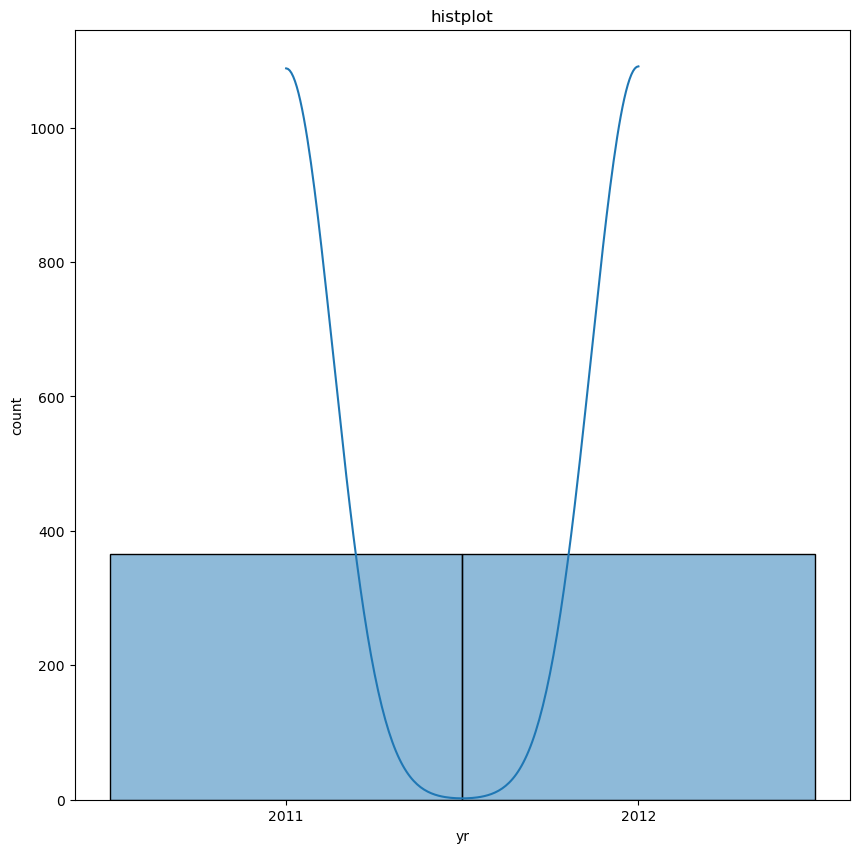

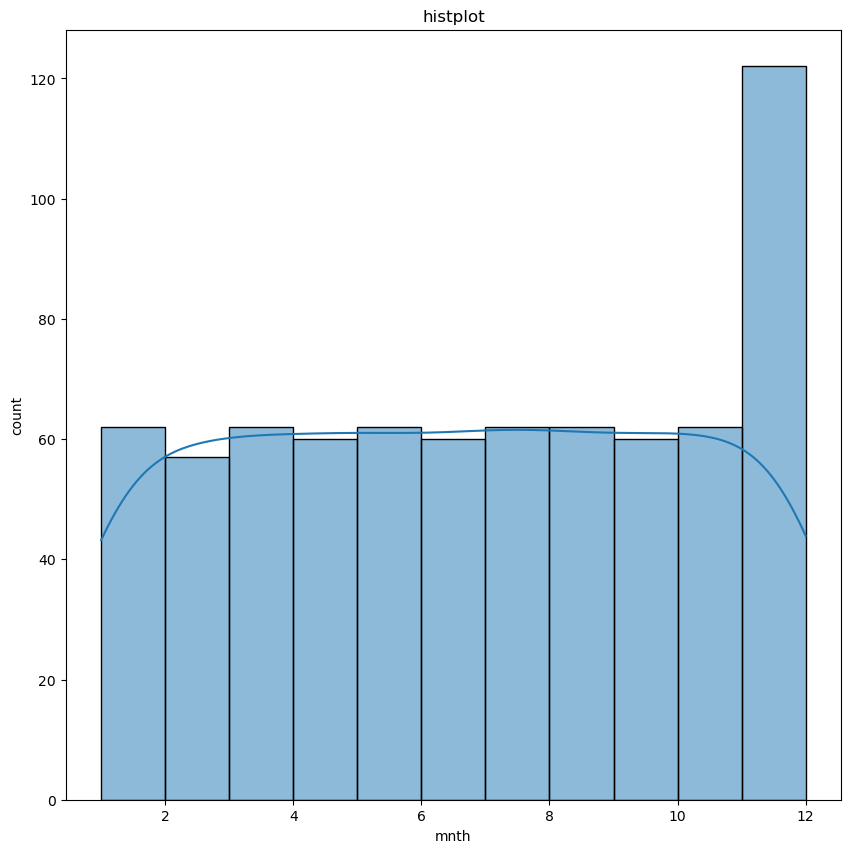

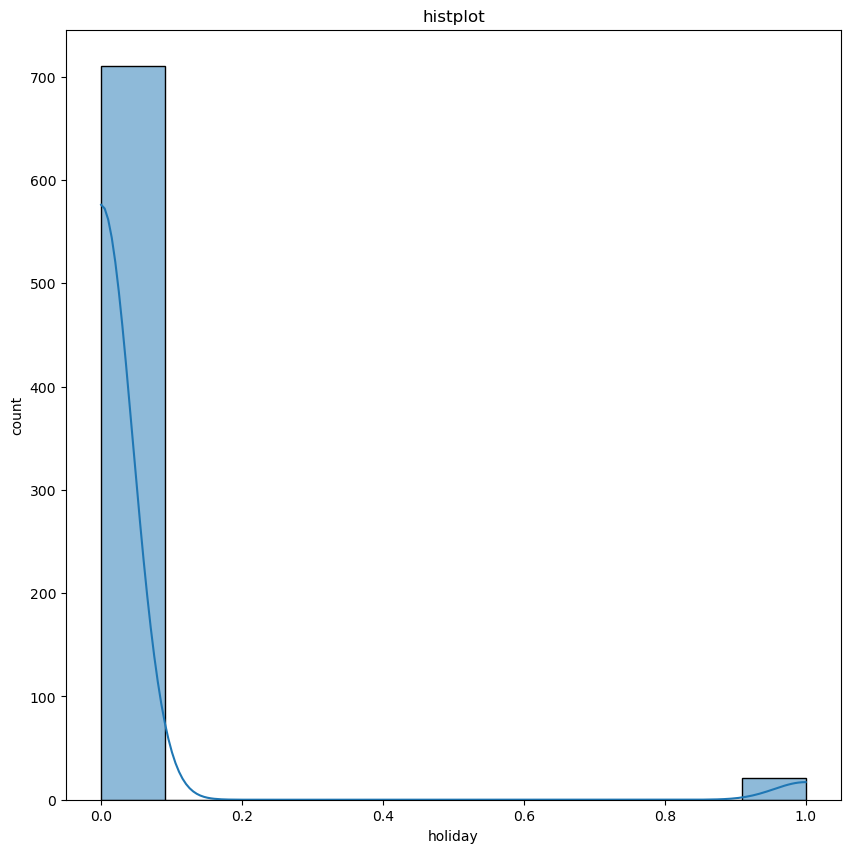

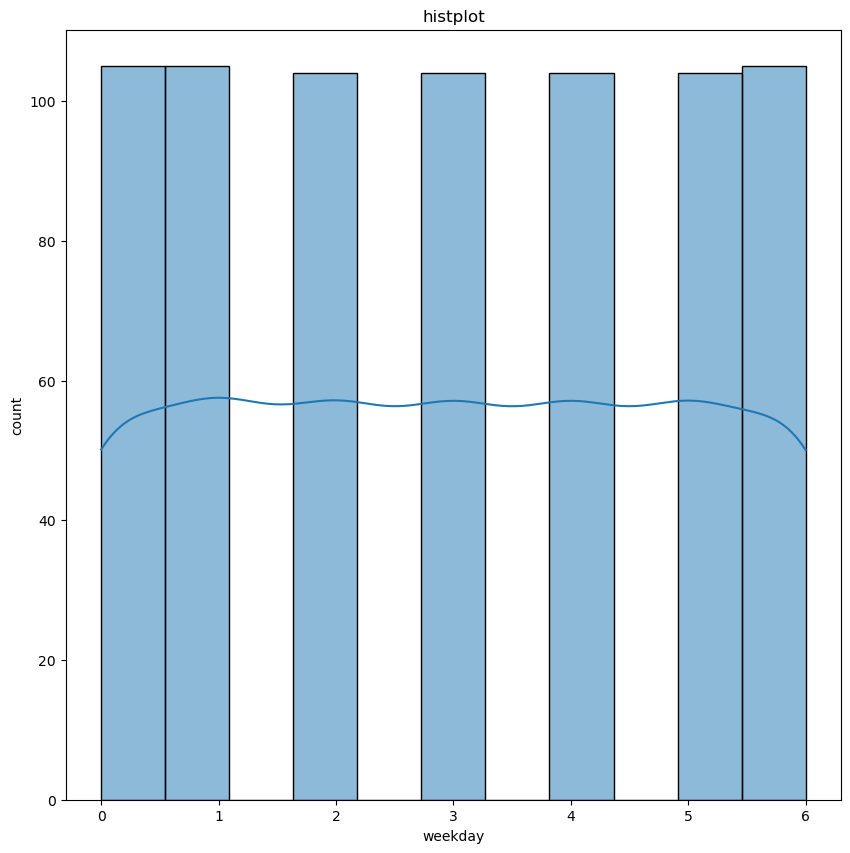

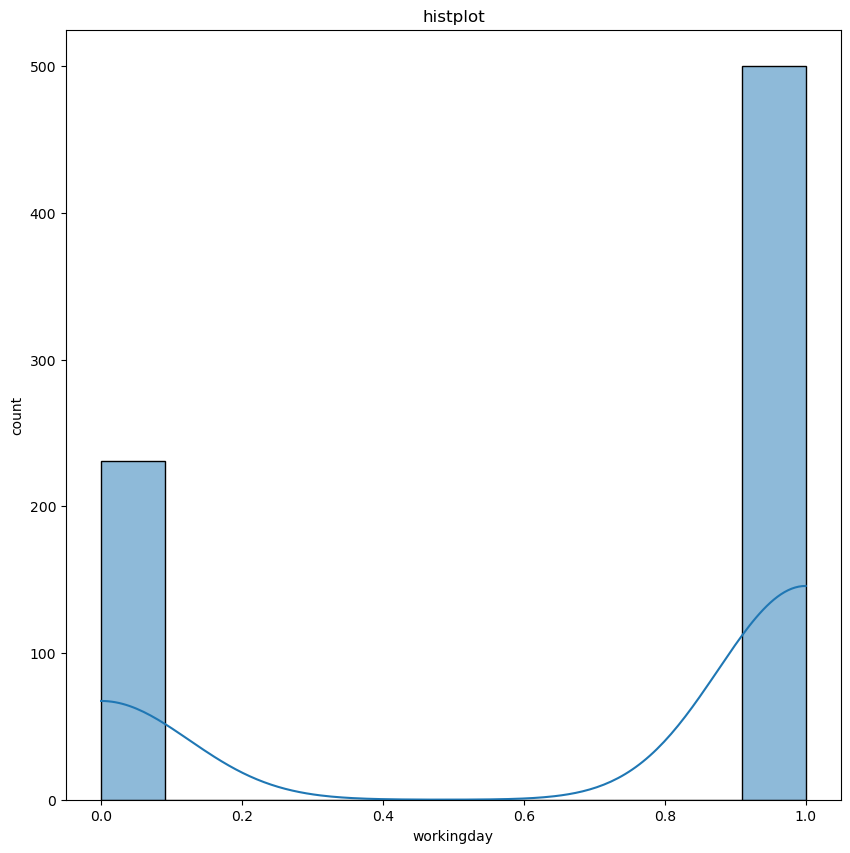

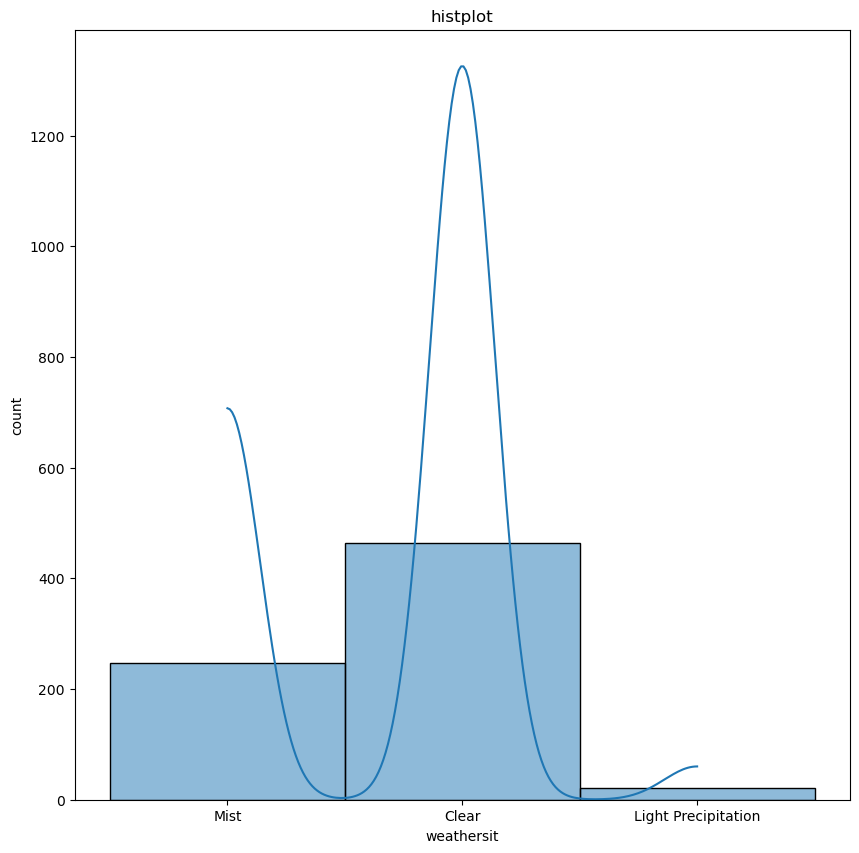

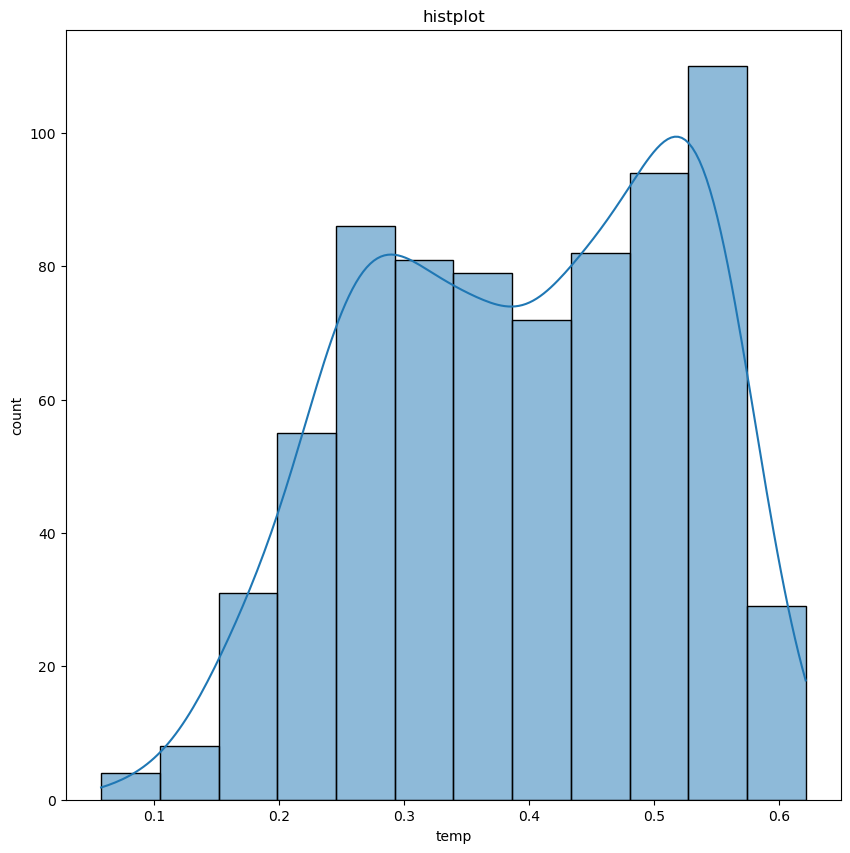

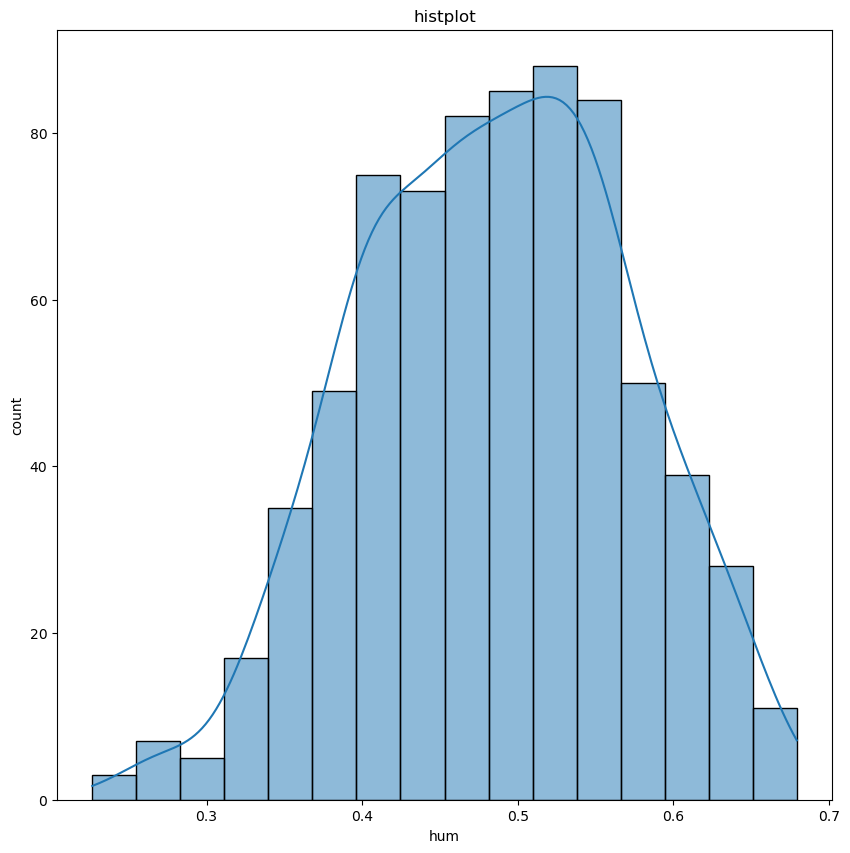

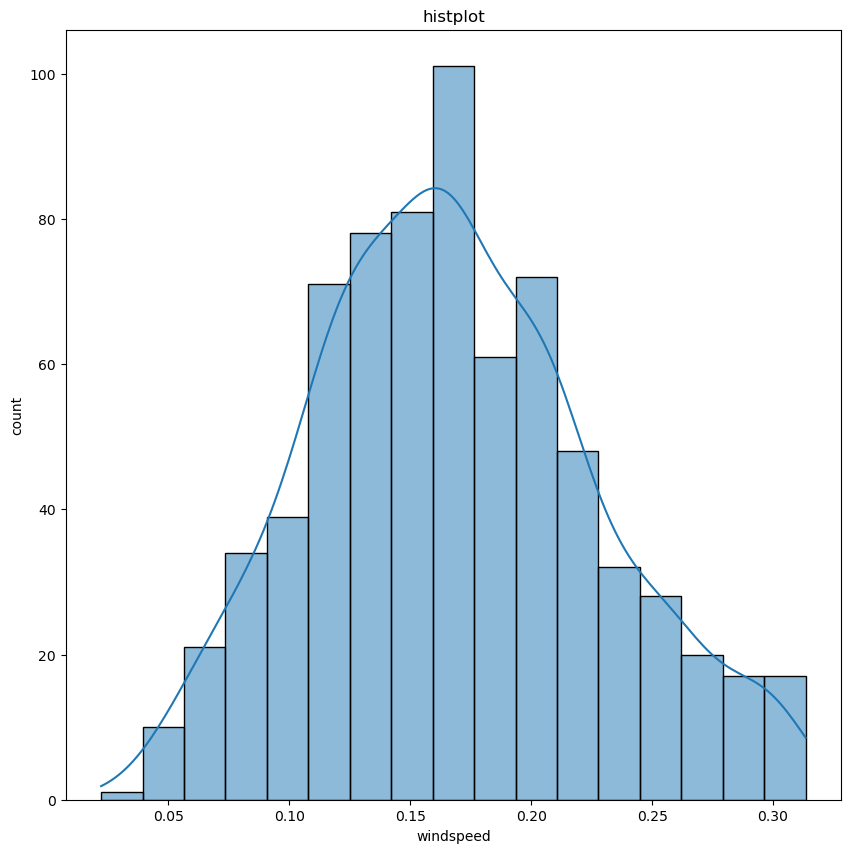

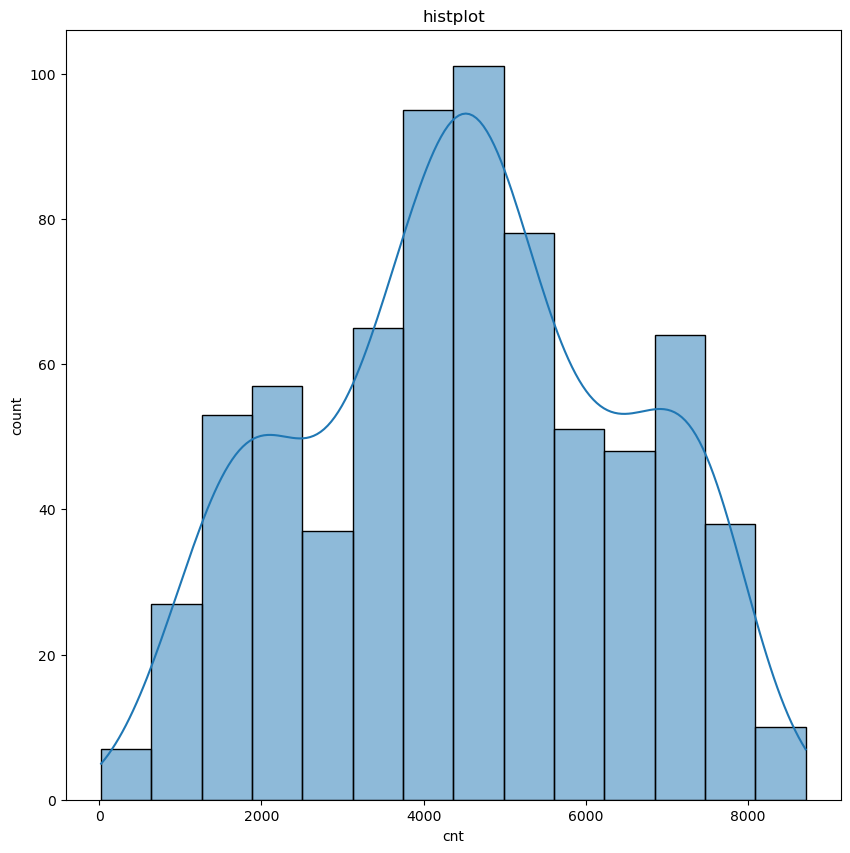

In [45]:
for i in data.columns:
    plt.figure(figsize=(10,10))
    sns.histplot(data, x=i, kde=True)
    plt.title('histplot')
    plt.xlabel(i)
    plt.ylabel('count')

In [46]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,winter,2011,1,0,6,0,Mist,0.295774,0.591022,0.148804,985
1,winter,2011,1,0,0,0,Mist,0.310039,0.528324,0.221974,801
2,winter,2011,1,0,1,1,Clear,0.179287,0.362748,0.221790,1349
3,winter,2011,1,0,2,1,Clear,0.182322,0.464008,0.148675,1562
4,winter,2011,1,0,3,1,Clear,0.204537,0.362528,0.171345,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,winter,2012,12,0,4,1,Mist,0.226472,0.502542,0.300203,2114
727,winter,2012,12,0,5,1,Mist,0.225806,0.463734,0.144508,3095
728,winter,2012,12,0,6,0,Mist,0.225806,0.561281,0.117234,1341
729,winter,2012,12,0,0,0,Clear,0.227799,0.394292,0.300663,1796


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    object 
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 62.9+ KB


# creating dummies

In [48]:
# select the columns 0 to 6
columns_to_encode = data.iloc[:,0:7]

# iterating through each column and create dummy variables
for column in columns_to_encode.columns:
    dummies_variable = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data, dummies_variable], axis=1)

# Drop the original columns after creating dummy variables
data = data.drop(columns_to_encode.columns, axis=1)

In [49]:
data

,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_Clear,weathersit_Light Precipitation,weathersit_Mist
0,0.295774,0.591022,0.148804,985,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True
1,0.310039,0.528324,0.221974,801,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True
2,0.179287,0.362748,0.221790,1349,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False
3,0.182322,0.464008,0.148675,1562,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False
4,0.204537,0.362528,0.171345,1600,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.226472,0.502542,0.300203,2114,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True
727,0.225806,0.463734,0.144508,3095,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,True
728,0.225806,0.561281,0.117234,1341,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,True
729,0.227799,0.394292,0.300663,1796,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,False,True,False,False


In [50]:
# changing True and False to 1 and 0 respectively
data.replace({True:1, False:0})

,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,yr_2011,yr_2012,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_Clear,weathersit_Light Precipitation,weathersit_Mist
0,0.295774,0.591022,0.148804,985,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
1,0.310039,0.528324,0.221974,801,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0.179287,0.362748,0.221790,1349,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
3,0.182322,0.464008,0.148675,1562,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
4,0.204537,0.362528,0.171345,1600,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.226472,0.502542,0.300203,2114,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1
727,0.225806,0.463734,0.144508,3095,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1
728,0.225806,0.561281,0.117234,1341,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1
729,0.227799,0.394292,0.300663,1796,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   temp                            731 non-null    float64
 1   hum                             731 non-null    float64
 2   windspeed                       731 non-null    float64
 3   cnt                             731 non-null    int64  
 4   season_fall                     731 non-null    bool   
 5   season_spring                   731 non-null    bool   
 6   season_summer                   731 non-null    bool   
 7   season_winter                   731 non-null    bool   
 8   yr_2011                         731 non-null    bool   
 9   yr_2012                         731 non-null    bool   
 10  mnth_1                          731 non-null    bool   
 11  mnth_2                          731 non-null    bool   
 12  mnth_3                          731 

# separating X and y

In [52]:
X = data.drop('cnt', axis=1)
y = data.cnt

# separating train and test data

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [54]:
X_train.shape

(584, 35)

In [55]:
y_train.shape

(584,)

In [56]:
X_test.shape

(147, 35)

In [57]:
y_test.shape

(147,)

# standardizing

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,-0.836667,0.258910,2.170480,1.772525,-0.590533,-0.590533,-0.564167,-0.966320,0.966320,-0.319197,-0.295843,-0.271163,-0.299253,-0.322443,-0.305995,-0.302636,-0.295843,-0.305995,-0.319197,3.380167,-0.281926,0.162364,-0.162364,-0.429633,-0.395519,2.474258,-0.395519,-0.426833,-0.38679,-0.418390,-0.702571,0.702571,-1.300478,-0.178331,1.390925
1,0.754809,2.045541,0.140460,-0.564167,-0.590533,1.693384,-0.564167,1.034854,-1.034854,-0.319197,-0.295843,-0.271163,-0.299253,-0.322443,-0.305995,-0.302636,-0.295843,3.268027,-0.319197,-0.295843,-0.281926,0.162364,-0.162364,-0.429633,-0.395519,-0.404162,-0.395519,2.342838,-0.38679,-0.418390,-0.702571,0.702571,-1.300478,5.607535,-0.718946
2,-1.108360,-0.095523,-1.319036,1.772525,-0.590533,-0.590533,-0.564167,1.034854,-1.034854,-0.319197,-0.295843,-0.271163,-0.299253,-0.322443,-0.305995,-0.302636,-0.295843,-0.305995,-0.319197,-0.295843,3.547026,0.162364,-0.162364,-0.429633,-0.395519,-0.404162,-0.395519,-0.426833,-0.38679,2.390114,1.423344,-1.423344,0.768948,-0.178331,-0.718946
3,0.100375,0.480766,-0.066644,-0.564167,-0.590533,1.693384,-0.564167,1.034854,-1.034854,-0.319197,-0.295843,-0.271163,-0.299253,-0.322443,-0.305995,-0.302636,-0.295843,3.268027,-0.319197,-0.295843,-0.281926,0.162364,-0.162364,2.327570,-0.395519,-0.404162,-0.395519,-0.426833,-0.38679,-0.418390,1.423344,-1.423344,0.768948,-0.178331,-0.718946
4,1.065091,-2.075679,1.244736,-0.564167,-0.590533,1.693384,-0.564167,-0.966320,0.966320,-0.319197,-0.295843,-0.271163,-0.299253,-0.322443,3.268027,-0.302636,-0.295843,-0.305995,-0.319197,-0.295843,-0.281926,0.162364,-0.162364,-0.429633,-0.395519,-0.404162,2.528321,-0.426833,-0.38679,-0.418390,-0.702571,0.702571,0.768948,-0.178331,-0.718946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,-0.592242,-0.728061,1.228880,-0.564167,-0.590533,-0.590533,1.772525,1.034854,-1.034854,-0.319197,-0.295843,3.687818,-0.299253,-0.322443,-0.305995,-0.302636,-0.295843,-0.305995,-0.319197,-0.295843,-0.281926,0.162364,-0.162364,2.327570,-0.395519,-0.404162,-0.395519,-0.426833,-0.38679,-0.418390,1.423344,-1.423344,0.768948,-0.178331,-0.718946
580,-0.178397,-1.097260,1.668801,-0.564167,1.693384,-0.590533,-0.564167,1.034854,-1.034854,-0.319197,-0.295843,-0.271163,3.341656,-0.322443,-0.305995,-0.302636,-0.295843,-0.305995,-0.319197,-0.295843,-0.281926,0.162364,-0.162364,2.327570,-0.395519,-0.404162,-0.395519,-0.426833,-0.38679,-0.418390,1.423344,-1.423344,0.768948,-0.178331,-0.718946
581,0.760214,1.488807,-0.508311,1.772525,-0.590533,-0.590533,-0.564167,1.034854,-1.034854,-0.319197,-0.295843,-0.271163,-0.299253,-0.322443,-0.305995,-0.302636,-0.295843,3.268027,-0.319197,-0.295843,-0.281926,0.162364,-0.162364,-0.429633,-0.395519,-0.404162,2.528321,-0.426833,-0.38679,-0.418390,-0.702571,0.702571,-1.300478,-0.178331,1.390925
582,-0.726068,-1.117884,0.565780,-0.564167,-0.590533,-0.590533,1.772525,-0.966320,0.966320,-0.319197,-0.295843,3.687818,-0.299253,-0.322443,-0.305995,-0.302636,-0.295843,-0.305995,-0.319197,-0.295843,-0.281926,0.162364,-0.162364,2.327570,-0.395519,-0.404162,-0.395519,-0.426833,-0.38679,-0.418390,1.423344,-1.423344,0.768948,-0.178331,-0.718946


In [60]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,-0.072163,0.743193,-0.130356,1.772525,-0.590533,-0.590533,-0.564167,-0.966320,0.966320,-0.319197,-0.295843,-0.271163,-0.299253,-0.322443,-0.305995,-0.302636,-0.295843,-0.305995,-0.319197,-0.295843,3.547026,0.162364,-0.162364,-0.429633,-0.395519,2.474258,-0.395519,-0.426833,-0.386790,-0.418390,-0.702571,0.702571,0.768948,-0.178331,-0.718946
1,-1.842482,-1.429625,1.325443,-0.564167,-0.590533,-0.590533,1.772525,1.034854,-1.034854,-0.319197,3.380167,-0.271163,-0.299253,-0.322443,-0.305995,-0.302636,-0.295843,-0.305995,-0.319197,-0.295843,-0.281926,0.162364,-0.162364,-0.429633,-0.395519,-0.404162,-0.395519,2.342838,-0.386790,-0.418390,-0.702571,0.702571,0.768948,-0.178331,-0.718946
2,-0.912645,-0.292129,0.662541,1.772525,-0.590533,-0.590533,-0.564167,1.034854,-1.034854,-0.319197,-0.295843,-0.271163,-0.299253,-0.322443,-0.305995,-0.302636,-0.295843,-0.305995,3.132860,-0.295843,-0.281926,0.162364,-0.162364,-0.429633,-0.395519,-0.404162,-0.395519,-0.426833,2.585384,-0.418390,-0.702571,0.702571,-1.300478,-0.178331,1.390925
3,-0.352274,0.351624,-0.157675,-0.564167,1.693384,-0.590533,-0.564167,-0.966320,0.966320,-0.319197,-0.295843,-0.271163,3.341656,-0.322443,-0.305995,-0.302636,-0.295843,-0.305995,-0.319197,-0.295843,-0.281926,0.162364,-0.162364,2.327570,-0.395519,-0.404162,-0.395519,-0.426833,-0.386790,-0.418390,1.423344,-1.423344,-1.300478,-0.178331,1.390925
4,0.326327,-0.408624,0.758065,1.772525,-0.590533,-0.590533,-0.564167,-0.966320,0.966320,-0.319197,-0.295843,-0.271163,-0.299253,-0.322443,-0.305995,-0.302636,-0.295843,3.268027,-0.319197,-0.295843,-0.281926,0.162364,-0.162364,-0.429633,-0.395519,2.474258,-0.395519,-0.426833,-0.386790,-0.418390,-0.702571,0.702571,0.768948,-0.178331,-0.718946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,-0.922825,-0.228247,0.540249,-0.564167,-0.590533,-0.590533,1.772525,1.034854,-1.034854,-0.319197,-0.295843,3.687818,-0.299253,-0.322443,-0.305995,-0.302636,-0.295843,-0.305995,-0.319197,-0.295843,-0.281926,0.162364,-0.162364,-0.429633,-0.395519,-0.404162,-0.395519,-0.426833,-0.386790,2.390114,1.423344,-1.423344,0.768948,-0.178331,-0.718946
143,1.515204,-0.489009,0.248443,-0.564167,-0.590533,1.693384,-0.564167,1.034854,-1.034854,-0.319197,-0.295843,-0.271163,-0.299253,-0.322443,-0.305995,3.304295,-0.295843,-0.305995,-0.319197,-0.295843,-0.281926,0.162364,-0.162364,-0.429633,-0.395519,2.474258,-0.395519,-0.426833,-0.386790,-0.418390,-0.702571,0.702571,0.768948,-0.178331,-0.718946
144,-0.647307,0.124317,-1.270213,1.772525,-0.590533,-0.590533,-0.564167,1.034854,-1.034854,-0.319197,-0.295843,-0.271163,-0.299253,-0.322443,-0.305995,-0.302636,-0.295843,-0.305995,-0.319197,3.380167,-0.281926,0.162364,-0.162364,-0.429633,-0.395519,-0.404162,-0.395519,-0.426833,2.585384,-0.418390,-0.702571,0.702571,0.768948,-0.178331,-0.718946
145,0.718687,-1.159541,-0.221741,-0.564167,1.693384,-0.590533,-0.564167,1.034854,-1.034854,-0.319197,-0.295843,-0.271163,-0.299253,-0.322443,3.268027,-0.302636,-0.295843,-0.305995,-0.319197,-0.295843,-0.281926,0.162364,-0.162364,-0.429633,-0.395519,-0.404162,2.528321,-0.426833,-0.386790,-0.418390,-0.702571,0.702571,0.768948,-0.178331,-0.718946


# Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred_train = lr.predict(X_train)

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_train, y_pred_train)

0.845117051981004

In [65]:
y_test_pred = lr.predict(X_test)

In [66]:
r2_score(y_test, y_test_pred)

0.8361279799068062

In [67]:
y_pred = lr.predict(X_test)

###### y_pred

In [68]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred )

In [69]:
r2

0.8361279799068062

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_true and y_pred are the true and predicted values, respectively
# Calculate Mean Squared Error (r2)
r2 = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (r2):",   r2)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2 Score):",      r_squared)


Mean Squared Error (r2): 657107.510966091
Mean Absolute Error (MAE): 595.6785640090478
R-squared (R2 Score): 0.8361279799068062


# Lasso Regression

In [71]:
from sklearn.linear_model import Lasso

# Create an instance of Lasso regression model
lasso_model = Lasso(alpha=1.0)  # Set the regularization parameter alpha

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict the target variable for test data
y_pred = lasso_model.predict(X_test)

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_true and y_pred are the true and predicted values, respectively
# Calculate Mean Squared Error (r2)
r2 = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (r2):",   r2)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2 Score):",      r_squared)

Mean Squared Error (r2): 656358.5655562809
Mean Absolute Error (MAE): 595.2333056357985
R-squared (R2 Score): 0.8363147548183646


# SVM

In [73]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_true and y_pred are the true and predicted values, respectively
# Calculate Mean Squared Error (r2)
r2 = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (r2):",   r2)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2 Score):",      r_squared)

Mean Squared Error (r2): 1535679.2223280068
Mean Absolute Error (MAE): 1029.8134631483224
R-squared (R2 Score): 0.617026358429463


# Grid search CV

In [75]:
from sklearn.model_selection import GridSearchCV
# Create a Linear Regression model
model = LinearRegression()

# Define the hyperparameters grid
param_grid = {'fit_intercept': [True, False], 'positive':[True,False], 'copy_X':[True,False]
    # You can include other hyperparameters specific to Linear Regression
    # For example, ,
    # 'normalize': [True, False]
}
# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (neg_mean_squared_error):", best_score)

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score (R^2):", test_score)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best Score (neg_mean_squared_error): -674114.1294554976
Test Score (R^2): 0.8196134579740829


In [76]:
import warnings
warnings.filterwarnings("ignore")

In [77]:
model = Lasso()

# Define the hyperparameters grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'precompute': [True, False],
    'warm_start': [True, False],
    'positive': [True, False],
    'random_state': [True, False],
    'selection' : ['cyclic', 'random']
    # Example values for the regularization parameter alpha
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (neg_mean_squared_error):", best_score)

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score (R^2):", test_score)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best Parameters: {'alpha': 10.0, 'fit_intercept': True, 'positive': False, 'precompute': True, 'random_state': True, 'selection': 'cyclic', 'warm_start': True}
Best Score (neg_mean_squared_error): -646371.2974851808
Test Score (R^2): 0.8379595178770275


In [78]:
la = Lasso(alpha= 10.0, fit_intercept= True, positive= False, precompute= False, random_state= True, selection= 'cyclic', warm_start= True)
la.fit(X_train, y_train)

Lasso(alpha=10.0, random_state=True, warm_start=True)

In [79]:
y_pred = la.predict(X_test)

In [80]:
r2 = r2_score(y_test,y_pred)

In [81]:
r2

0.8379595178770274

# ANN

In [82]:
from keras.models import Sequential
from keras.layers import Dense
# Create a Sequential model
model = Sequential()

# Add a single neuron for linear regression
model.add(Dense(1, input_dim=X_train.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (r2)
r2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", r2)

2024-03-30 12:39:43,730 - WARNING  - From D:\Anaconda\Lib\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.

2024-03-30 12:39:46,004 - WARNING  - From D:\Anaconda\Lib\site-packages\keras\src\backend.py:873: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

2024-03-30 12:39:46,361 - WARNING  - From D:\Anaconda\Lib\site-packages\keras\src\optimizers\__init__.py:309: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Epoch 1/100


2024-03-30 12:39:47,163 - WARNING  - From D:\Anaconda\Lib\site-packages\keras\src\utils\tf_utils.py:492: The name tf.ragged.RaggedTensorValue is deprecated. Please use tf.compat.v1.ragged.RaggedTensorValue instead.



19/19 [==============================] - 1s 3ms/step - loss: 24465182.0000
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 24464746.0000
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 24464334.0000
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 24463902.0000
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 24463464.0000
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 24463018.0000
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 24462600.0000
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 24462176.0000
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 24461744.0000
Epoch 10/100
19/19 [==============================] - 0s 4ms/step - loss: 24461334.0000
Epoch 11/100
19/19 [==============================] - 0s 4ms/step - loss: 24460902.0000
Epoch 12/100
19/19 [==============================] -

In [83]:
r2 = r2_score(y_test, y_pred)
r2

-4.557482614022465

# Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Calculate r2_score
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)

r2 score: 0.8986210761716231


# XGBoost

In [85]:
import xgboost as xgb
# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the model to the training data
xg_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg_reg.predict(X_test)

# Calculate r2_score
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)

r2 score: 0.886054398866718


Therefore, Gradient Boosting is the best algorithm for the above dataset

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

# Assuming X_train, y_train, X_test, y_test are your training and testing data

# Create Gradient Boosting Regressor object
gb_regressor = GradientBoostingRegressor()

# Define hyperparameters and their values for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=10, scoring='r2', verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_gb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_gb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2_score:", r2)


Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
r2_score: 0.901841927266569


In [87]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Assuming X_train, y_train, X_test, y_test are your training and testing data

# Create XGBoost Regressor object
xgb_regressor = XGBRegressor()

# Define hyperparameters and their values for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=15, scoring='r2', verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 socre:", r2)


Fitting 15 folds for each of 27 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
r2 socre: 0.8966413164965816


In [88]:
import pandas as pd

# Create the DataFrame
data = {
    'Model': [ 'Linear Regression', 'Lasso Regression', 'SVM', 'Gradient Boosting', 'XG Boost'],
    'R2 Score': [0.83, 0.83, 0.61, 0.89, 0.88]
}

df = pd.DataFrame(data)


In [89]:
df

,Model,R2 Score
0,Linear Regression,0.83
1,Lasso Regression,0.83
2,SVM,0.61
3,Gradient Boosting,0.89
4,XG Boost,0.88


##### Challenges Faced:

         * Initially we have found that some of the column or features in the dataframe are irrelevant to the column.
         * After gaining the domain analysis ,we get to know that which are the important feature and how it will contributed to the model prediction.
         * Later on there are few categorical data in the dataframe,so we have to change that too.

##### Conclusion:

        * After doing all steps from basic check to finally hyperparameter tuning ,we get to now that Gradient boosting has the best R2 score value.
        * Gradient boosting is the best model.